# NLP 2025
# Lab 3: Attention and Pre-trained Models

Our practical journey in NLP has so far covered the following:

🧪 Lab 1: Tokenize and pre-process text in different ways.

🧠 Lab 2: Train different representation models (e.g. TF-IDF) and/or use pre-trained word embeddings with useful applications (such as information retrieval).

🚀 We will now escalate from using pre-trained static word embeddings to use pre-trained models (like BERT). The model is pre-trained on vast amounts of data 📚 and that allows for better generalization. As we discussed in class, BERT models are based on transformers 🤖, which use attention to model sequences (in our case sequences of words).

💡 BERT provides for contextualized embeddings, aka the embedding vector of a word is only determined once the actual context of that word is known. 👉 Practically, this allows for words to have different embedding vectors depending on their actual context (e.g. think of the word "bank" 🏦🏞️ and its multiple meanings in different contexts).

In this lab, we will learn how to load and use pre-trained models (e.g. BERT) from Huggingface 🤗.

By the end of this lab you should be able to:

- 🧠📦Load and/or use pre-trained models and tokenizers to solve different NLP tasks
- 🔍🧬 Inspect and analyze the inner workings (hidden layers etc.) of attention models (like BERT)
- 🧲📝 Use attention models to get sentence representations (aka sentence embeddings)
- 📚🎯 Use BERT sentence embeddings to solve more complicated tasks like information retrieval
- ⚖️📊 Compare performance of different models and assess their effectiveness
- 🛠️🐍 Load and use the basics of pytorch and huggingface transformers (important frameworks in NLP)

### Score breakdown

| Exercise            | Points |
|---------------------|--------|
| [Exercise 1](#e1)   | 1      |
| [Exercise 2](#e2)   | 3      |
| [Exercise 3](#e3)   | 5      |
| [Exercise 4](#e4)   | 2      |
| [Exercise 5](#e5)   | 10     |
| [Exercise 6](#e6)   | 5      |
| [Exercise 7](#e7)   | 10     |
| [Exercise 8](#e8)   | 2      |
| [Exercise 9](#e9)   | 1      |
| [Exercise 10](#e10) | 3      |
| [Exercise 11](#e11) | 10     |
| [Exercise 12](#e12) | 3      |
| [Exercise 13](#e13) | 10     |
| [Exercise 14](#e14) | 10     |
| [Exercise 15](#e15) | 15     |
| [Exercise 16](#e16) | 10     |
| Total               | 100    |

This score will be scaled down to 1 and that will be your final lab score.

### 📌 **Instructions for Delivery** (📅 **Deadline: 2/May 18:00**, 🎭 *wildcards possible*)

✅ **Submission Requirements**
+ 📄 You need to submit a **PDF of your report** (use the templates provided in **LaTeX** 🖋️ (*preferred*) or **Word** 📑) and a **copy of your notebook** 📓 with the code.
+ ⚡ Make sure that **all cells are executed properly** ⚙️ and that **all figures/results/plots** 📊 you include in the report are also visible in your **executed notebook**.

✅ **Collaboration & Integrity**
+ 🗣️ While you may **discuss** the lab with others, you must **write your solutions with your group only**. If you **discuss specific tasks** with others, please **include their names** in the appendix of the report.
+ 📜 **Honor Code applies** to this lab. For more details, check **Syllabus §7.2** ⚖️.
+ 📢 **Mandatory Disclosure**:
   - Any **websites** 🌐 (e.g., **Stack Overflow** 💡) or **other resources** used must be **listed and disclosed**.
   - Any **GenAI tools** 🤖 (e.g., **ChatGPT**) used must be **explicitly mentioned**.
   - 🚨 **Failure to disclose these resources is a violation of academic integrity**. See **Syllabus §7.3** for details.

## 0. Setup (Huggingface + PyTorch  = ❤️)

You should know the drill by now. As in the last lab, we will be using huggingface datasets library ([https://huggingface.co/datasets](https://huggingface.co/datasets)). You can find the detailed documentation and tutorials here: [https://huggingface.co/docs/datasets/en/index](https://huggingface.co/docs/datasets/en/index)

If you don't have it installed you can run the code below (if in Google Colab) or copy the code to the terminal (if you run locally):

In [5]:
#! pip install -U datasets

zsh:1: command not found: pip


Next, we will need [PyTorch](https://pytorch.org/) installed. It is a very popular deep learning library that offers modularized versions of many of the sequence models we discussed in class. It's an important tool that you may want to practice further if you want to dive deeper into NLP, since much of the current academic and industrial research uses it.

Some resources to look further are given below.

* [Documentation](https://pytorch.org/docs/stable/index.html) (We will need this soon)

* [Installation Instructions](https://pytorch.org/get-started/locally/)

* [Quickstart Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

The cell below should install the library:

In [4]:
 # ! pip install torch torchvision torchaudio

zsh:1: command not found: pip


The last bit we need is the huggingface transformers library (here is the documentation [https://huggingface.co/docs/transformers/en/index](https://huggingface.co/docs/transformers/en/index)). Transformers are one of the most influential architectures in handling sequences (not only in language). As we discussed in lectures, they excel at taking into account context (which is the salt-and-pepper of NLP) with mechansisms such as self-attetion, which allows them to weigh the importance of different words in a sentence. If you want to know more, revisit the course material (slides and textbook).

We already used huggingface datasets in previous labs and huggingface transformers integrates nicely with that. Apart from the ease of use, huggingface is also providing pre-trained models of different kinds. The list can be found [here](https://huggingface.co/models) ([https://huggingface.co/models](https://huggingface.co/models)). The following line should be enough to install huggingface transformers library:

In [3]:
#! pip install transformers

zsh:1: command not found: pip


In [2]:
import sys
print(sys.executable)


/Users/mariowettig/PycharmProjects/NLP_Labs/.venv/bin/python


As usual, we start by importing some essential Python libraries that we will be using.

In [3]:
import math

import numpy as np
import matplotlib.pyplot as plt
import datasets
import transformers
import tqdm
import torch

## 1. Load and Preprocess Data

For easiness and comparison purposes, we will ue the same dataset as in the previous lab. That will help us re-visit the approach and see whether contextualized architectures can do better in the same problem/task/dataset.

As a reminder:

*Sentence compression* involves rephrasing sentences to make them shorter while still retaining the original meaning. A reliable compression system would be valuable for mobile devices and could also serve as a component in an extractive summarization system.

The dataset we are going to use can be found on [Huggingface](https://huggingface.co/datasets/embedding-data/sentence-compression). It concerns a set of 180,000 pairs of sentences, aka it is a parallel corpus of sentences and their equivalent compressions. It has been collected by harvesting news articles from the Internet where the headline appears to be similar to the first sentence and that property is used to find an "extractive" compression of the sentence.

For example, for the sentence

`"Regulators Friday shut down a small Florida bank, bringing to 119 the number of US bank failures this year amid mounting loan defaults"`

the compressed equivalent (based on the dataset) is:

`"Regulators shut down small Florida bank"`.


For more information you can read the original paper (from Google) [here](https://aclanthology.org/D13-1155.pdf).

### 1.1 Loading the Dataset

The dataset will be loaded as a huggingface datgaset. This may take a few minutes because of the large size of the data.

Make sure to inspect the dataset and make sure it is imported properly.

In [4]:
ds = datasets.load_dataset('embedding-data/sentence-compression')
print(ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 180000
    })
})


In [5]:
for i in range(10):
    print(ds['train'][i])

{'set': ["The USHL completed an expansion draft on Monday as 10 players who were on the rosters of USHL teams during the 2009-10 season were selected by the League's two newest entries, the Muskegon Lumberjacks and Dubuque Fighting Saints.", 'USHL completes expansion draft']}
{'set': ['Major League Baseball Commissioner Bud Selig will be speaking at St. Norbert College next month.', 'Bud Selig to speak at St. Norbert College']}
{'set': ["It's fresh cherry time in Michigan and the best time to enjoy this delicious and nutritious fruit.", "It's cherry time"]}
{'set': ['An Evesham man is facing charges in Pennsylvania after he allegedly dragged his girlfriend from the side of his pickup truck on the campus of Kutztown University in the early morning hours of Dec. 5, police said.', 'Evesham man faces charges for Pa.']}
{'set': ["NRT LLC, one of the nation's largest residential real estate brokerage companies, announced several executive appointments within its Coldwell Banker Residential B

The dataset comes with a `train` split so we will have to split that into `train`/`test` ourselves with the line below.

In [6]:
split_ds = ds['train'].train_test_split(test_size=0.2)
print(split_ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['set'],
        num_rows: 36000
    })
})


Note that previously, we had very much full control over the vocabulary of the dataset (in terms of pre-processing including tokenization). That is because we wanted to build our own embedding model.

By using a *pre-trained* model (like we are going to do at this lab), we need to adhere to the way this model was trained (including the tokenization). Huggingface provides the models, along with the relevant tokenizers, therefore cleaning is not necessary (as in previous labs). You can still include it if you think this would improve the results of the retrieval in the later parts of the lab.

<a name='e1'></a>
### Exercise 1 Unpacking the set
(1p) Instead of cleaning, we will unpack the `set` (containing tuples of full and compressed sentences) column into separate `sentence` and `compressed` columns. This will make it a bit easier for us later.

One key difference in this function is the fact that it will accept a batch of examples (instead of a single example in the exercises in the previous lab). You can iterate through the examples this way:

```
for set in examples['set']
```

The new columns should be lists containing strings (full or compressed sentences) extracted from the `set` column.

Fill in the function below to complete this task

In [7]:
def unpack(examples):
    """
    Unpacks the column `set` into two columns `sentence` and `compressed`.
    Args:
        examples: a batch of examples from the dataset

    Returns: modified examples with two new columns: `sentence` and `compressed`

    """
    sentences = []
    compressed_sentences = []

    ### YOUR CODE HERE

    for set in examples['set']:
        sentences.append(set[0])
        compressed_sentences.append(set[1])  
    
    ### YOUR CODE ENDS HERE

    examples['sentence'] = sentences
    examples['compressed'] = compressed_sentences
    return examples

In the next cell, we will apply the `unpack` function to the whole dataset. Notice that we also drop the original `set` column.

In [8]:
split_ds = split_ds.map(unpack, batched=True, remove_columns=['set'])
print(split_ds)

Map:   0%|          | 0/144000 [00:00<?, ? examples/s]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'compressed'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['sentence', 'compressed'],
        num_rows: 36000
    })
})


Let's examine some examples from the dataset and make sure that we got the results we wanted.

In [9]:
for i in range(10):
    print(split_ds['train'][i])

{'sentence': 'East Hempfield Township residents turned out for a supervisors meeting to complain about helicopter noise.', 'compressed': 'Residents complain about helicopter noise'}
{'sentence': 'The legendary Wayne Carey will make a comeback with the Lions, the Palm Beach-Currumbin Lions, that is.', 'compressed': 'Wayne Carey makes comeback'}
{'sentence': "``Someone meddles in the trial on April events in Kyrgyzstan,'' Kubanychbek Tashbaltaev, the lawyer of the ex-chief of the State National Security Service, Murat Sutalinov, told a news conference in 24.kg news agency.", 'compressed': 'Someone meddles in the trial on April events in Kyrgyzstan --'}
{'sentence': "Jamshedpur, Mar 25 Jharkhand is on way to double its 'tassar' silk output to 300 tonne this year, by way of broad-basing the involvement of tribals and other locals in this forest-based produce.", 'compressed': 'Jharkhand to double tassar silk output'}
{'sentence': "Without first consulting your wife, girlfriend or significan

In this lab, we will be using only pre-trained models. That means that we won't be training any new model. This is the reason we can select only the `test` subset for the rest of the notebook (this is where we will be assessing the performance of the pre-trained models). At the same time, we will save much time, as we will not be processing the `train` subset.

In [10]:
test_ds = split_ds['test']
print(test_ds)

Dataset({
    features: ['sentence', 'compressed'],
    num_rows: 36000
})


### 1.2 Loading the Tokenizer

For the first part of this lab, we will be using a pre-trained BERT model from Huggingface, namely the [BERT Uncased](https://huggingface.co/google-bert/bert-base-uncased). You can read the original paper that introduced this model [here](https://aclanthology.org/N19-1423.pdf). This paper has been once of the most cited papers ever (currently having more than 100,000 citations).

We will specify the model name that can be found on the model's card on huggingface (revisit the first link). Make sure to check what other information Huggingface is offering (e.g. how to use the model, limitations, how to inference, etc.).

In [11]:
model_name = 'google-bert/bert-base-uncased'

The models on huggingface come with their own tokenizers. They are loaded separately from the models. We can use [AutoTokenizer](https://huggingface.co/docs/transformers/v4.40.2/en/model_doc/auto#transformers.AutoTokenizer)'s `from_pretrained()` method to load it.

Inspect the output: The loaded object is of `BertTokenizerFast` class. Check the documentation [here](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertTokenizerFast).

In [12]:
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
print(tokenizer)

BertTokenizerFast(name_or_path='google-bert/bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)


Next, let's see how we can use it to tokenize some text.

In [13]:
print(test_ds[0]['sentence'])
tokenized = tokenizer(test_ds[0]['sentence'], padding=True, return_tensors='pt')
print("---")
print(type(tokenized))
print("---")
print(tokenized)

Ganja worth Rs 2.70 lakh has been seized from a man posing as a reporter of a Urdu daily, police said.
---
<class 'transformers.tokenization_utils_base.BatchEncoding'>
---
{'input_ids': tensor([[  101, 25957,  3900,  4276, 12667,  1016,  1012,  3963,  2474, 10023,
          2038,  2042,  8243,  2013,  1037,  2158, 20540,  2004,  1037,  6398,
          1997,  1037, 12454,  3679,  1010,  2610,  2056,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1]])}


Examine the outputs: The tokenizer returned three things:
- `input_ids` - this is a PyTorch tensor ([https://pytorch.org/docs/stable/tensors.html](https://pytorch.org/docs/stable/tensors.html)) with the indices of our tokens. PyTorch tensors are similar to numpy arrays. They hold data in a multidimensional array or matrix. The difference is that PyTorch tensors can be placed and modified on the GPU which greatly improves the speed of execution.
- `token_type_ids` - this tensor holds the information about the index of the sentence. This has to do with the classification objective from the original paper, where two sentences were given and the model had to predict if they are connected. Because we only included a single sentence, we have only zeros here. We will not be concerned with it in this lab.
- `attention_mask` - holds the mask that the model will use to determine if the tokens in the `input_ids` are the real tokens or *padding*. Padding is a technique used to ensure that all input sequences have the same length. BERT (like many other NLP models) process data in batches and requires each sequence in a batch to have the same length, so sequences that are shorter than the maximum sequence length in the batch are padded with special tokens. In this case, because we only inputted a single sentence, the mask contains only ones. Later you will see examples where this is not the case.

Let's see how exactly the sentence was tokenized and how we can retrieve the original text. Notice that some words have been split into multiple tokens (remember when we discussed sub-word tokenization in class?). Also pay attention to the added special tokens, namely `CLS` and `SEP`:

The `[CLS]` token is a special classification token added at the beginning of every input sequence. It stands for "classification" (daah!) and is used by BERT to aggregate information from the entire sequence. The final hidden state corresponding to this token (after passing through the transformer layers) is used as the aggregate sequence representation for classification tasks. We will use this later in the lab!

The `[SEP]` token is used to separate different segments or sentences within the input sequence. It stands for "separator" (daaah again!).

In [14]:
print(tokenized['input_ids'].shape)
print("---")
print(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0]))
print("---")
print(len(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0]))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0], skip_special_tokens=True))

torch.Size([1, 29])
---
['[CLS]', 'gan', '##ja', 'worth', 'rs', '2', '.', '70', 'la', '##kh', 'has', 'been', 'seized', 'from', 'a', 'man', 'posing', 'as', 'a', 'reporter', 'of', 'a', 'urdu', 'daily', ',', 'police', 'said', '.', '[SEP]']
---
29
---
[CLS] ganja worth rs 2. 70 lakh has been seized from a man posing as a reporter of a urdu daily, police said. [SEP]
---
ganja worth rs 2. 70 lakh has been seized from a man posing as a reporter of a urdu daily, police said.


Tokenizer can process a list of sentences. This will create a batched output with tensor's first dimension corresponding to the batch size (the number of sentences we passed to the tokenizer). Examine the following cell and make sure it makes sense to you.

In [15]:
print(test_ds[0:3]['sentence'])
tokenized = tokenizer(test_ds[0:3]['sentence'], padding=True, return_tensors='pt')
print(tokenized)
print(tokenized['input_ids'].shape)
print(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0]))
print(len(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])))
print(tokenizer.decode(tokenized['input_ids'][0]))
print(tokenizer.decode(tokenized['input_ids'][0], skip_special_tokens=True))

['Ganja worth Rs 2.70 lakh has been seized from a man posing as a reporter of a Urdu daily, police said.', 'Mumbai, March 9 Filmmaker Tigmanshu Dhulia says the presence of Irrfan in his films leads him to write extraordinary stuff as he knows the actor can pull off anything.', "On Saturday, New York Giants tight end Jeremy Shockey hinted that he might not attend the team's mandatory minicamp, which begins on Wednesday."]
{'input_ids': tensor([[  101, 25957,  3900,  4276, 12667,  1016,  1012,  3963,  2474, 10023,
          2038,  2042,  8243,  2013,  1037,  2158, 20540,  2004,  1037,  6398,
          1997,  1037, 12454,  3679,  1010,  2610,  2056,  1012,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0],
        [  101,  8955,  1010,  2233,  1023, 12127, 14841, 25494, 14235, 28144,
         20922,  2758,  1996,  3739,  1997, 20868, 12881,  2319,  1999,  2010,
          3152,  5260,  2032,  2000,  4339,  9313,  4933,  2004,  2002,  4282,
          1996,  3364

<a name='e2'></a>
### Exercise 2 Questions about the tokenizer

Answer the following questions:
- (1p) What is the size of the vocabulary?
- (2p) What are the special tokens apart from `[CLS]` and `[SEP]`? What are their functions?

BertTokenizerFast(name_or_path='google-bert/bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

1. Vocab size == 30522
2. WE also have [PAD], [UNK] & [MASK] tokens:
	padding - for matching sequence lengths, 
	unkown - for unkown tokens (depends on what tokenization algorithm was used, but can be some character or sequence not seen in the training dataset), 
	mask - for the task of sequence missing word classification later on, we mask a token and try gto predict it suing this [MASK] special token

### 1.4 Loading the Model

In this section, we will load and examine the model. We will start with selecting the device we will place the model on. This will be a GPU (if one is available) or a CPU.

Google Colab offers free access to GPU, provided there is availability (also baed on quotas which may vary based on your usage and the overall demand on Colab's resources). If you are working locally, then if you don't have a GPU, CPU will be selected. For the first parts of the assignment running on CPU might be okay but when we have to load the dataset a GPU will be necessary.

The following cell will select the device for us.

In [16]:
# device = 'cuda:0' if torch.cuda.is_available() else 'cpu'


device = 'mps' if torch.backends.mps.is_available() else 'cpu'

print(f'Device: {device}')

Device: mps


Now, let's load the model from huggingface and place it (slowly because it's heavy due to the large number of parameters) on the device from the previous cell (the methods `to()`).

In [17]:
model = transformers.AutoModel.from_pretrained(model_name)
model.to(device)
print(model)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

<a name='e3'></a>
### Exercise 3 Questions about the Model

Examine the output of the previous cells. Answer the following questions:
- (1p) What is the number of transformer layers in this model?
- (1p) What is the dimension of the embeddings?
- (1p) What is the hidden size of the FFN in the transformer layer?
- (1p) What is the total number of parameters of the model (hint: check the `num_parameters()` method of the model)?
- (1p) How can you find the vocabulary size from the model?

In [18]:
model.num_parameters(), tokenizer.vocab_size

(109482240, 30522)

1. 12
2. 768
3. 3072
4. 109482240
5. CHECK WORD EMBEDDING DIMENSIONS - 30522 X 768 (30522 IS THE VOCab size) - or use tokenizer.vocab_size

Next, let's use BERT model for inference. We will tokenize the first sentence of our dataset and pass it to the model. We set `output_hidden_states` to `True` in order to have access to the hidden states of the model. Those represent the latent representations after embedding and transformer layers.

In [174]:
tokenized = tokenizer(test_ds[0]['sentence'], padding=True, return_tensors='pt').to(device)
print(tokenized)
model_output = model(**tokenized, output_hidden_states=True)
tokenized['input_ids'].shape

{'input_ids': tensor([[  101, 25957,  3900,  4276, 12667,  1016,  1012,  3963,  2474, 10023,
          2038,  2042,  8243,  2013,  1037,  2158, 20540,  2004,  1037,  6398,
          1997,  1037, 12454,  3679,  1010,  2610,  2056,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1]])}


torch.Size([1, 29])

Examine the next cell and make sure everything makes sense to you. Consult the [documentation](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertModel.forward) in case of doubt.

In [20]:
print(list(model_output.keys()))
print(type(model_output['pooler_output']))
print(model_output['pooler_output'].shape)
print(type(model_output['hidden_states']))
print(len(model_output['hidden_states']))
print(type(model_output['hidden_states'][0]))
print(model_output['hidden_states'][0].shape)

['last_hidden_state', 'pooler_output', 'hidden_states']
<class 'torch.Tensor'>
torch.Size([1, 768])
<class 'tuple'>
13
<class 'torch.Tensor'>
torch.Size([1, 29, 768])


## 2. Exploring BERT hidden states

In this section we will look in more detail into the embeddings (latent representations) of BERT model. As a reminder, BERT embeddings a type of contextual word embeddings generated by the BERT model. They capture the meaning of words in the actual context. Notice the contrast with the static word embeddings we worked with in the previous lab: Then, we only needed a large corpus to compute word embeddings. In the case of BERT, we need to pass the actual sequence through the model to get the equivalent vector. More specifically, we tokenize the sentence (based on the relevant model and tokenizer), add the special tokanes (`CLS` and `SEP`, which are added authomatically by the tokenizer) and pass the sentence in the model.

<a name='e4'></a>
### Exercise 4 Plotting the layer-wise similarities between words 

(2p) We will use the following function to plot the cosine similarity between tokens in different sentences. It takes `hidden_states` and `tokens_of_interest_ids` arguments. The `hidden_states` is a list of Tensors and contains the hidden states of the sentences. The size of the list is equal to the number of layers in the model (+1 for the initial embedding) and each element is a Tensor with the first dimension corresponding to the sentences in the batch and second to the tokens (see the previous code cell). The third dimension is the size of the embedding. The `tokens_of_interest_ids` is a list of integers of the size equal to the number of sentences. The integers are indices that identify tokens we want to compare with each other.

Fill in the function by first extracting the embeddings of the token-of-interest in a `layer` for two sentences `sent1` and `sent2`. Next, calculate the cosine similarity between the embeddings. You can use an existing PyTorch implementation of cosine similarity.

In [21]:
from typing import List
from itertools import combinations

def plot_evolving_similarities(hidden_states: List[torch.Tensor], tokens_of_interest_ids: List[int]):
    """
    Plots the evolving cosine similarity between the hidden representation of tokens in different sentences.
    Hidden states are provided as a list of tensors where each tensor corresponds to the layer of the model.
    Each tensor contains the hidden representations of each token (second dimension) of each sentence (first dimension).
    For each sentence there have to be a token of interest (can be the same).
    Args:
        hidden_states: a list of tensors containing the hidden representations of sentences
        tokens_of_interest_ids: a list of indices of tokens of interest
    """
    assert hidden_states[0].shape[0] == len(tokens_of_interest_ids), \
        'The batch size of hidden_states must be equal to the number of tokens of interest'

    num_layers = len(hidden_states)
    num_sentences = len(tokens_of_interest_ids)
    # Creates a list of all possible combinations of sentences
    sentence_combinations = list(combinations(range(num_sentences), 2))
    similarities = [[] for _ in range(len(sentence_combinations))]
    for layer in range(num_layers):
        for i, (sent1, sent2) in enumerate(sentence_combinations):

            ### YOUR CODE HERE
            # 1. Extract embeddings for the tokens of interest in the current layer for sent1 and sent2
            # 2. Compute the cosine similarity between the two embeddings

            sent1_embedding = hidden_states[layer][sent1][tokens_of_interest_ids[sent1]]
            sent2_embedding = hidden_states[layer][sent2][tokens_of_interest_ids[sent2]]
            
            cosine_similarity = torch.nn.functional.cosine_similarity(sent1_embedding, sent2_embedding, dim=0)
            # print(f'Cosine similarity between {sent1 + 1} and {sent2 + 1} in layer {layer}: {cosine_similarity.item()}')

            ### YOUR CODE ENDS HERE
            
            similarities[i].append(cosine_similarity.item())

    for i, (sent1, sent2) in enumerate(sentence_combinations):
        plt.plot(range(num_layers), similarities[i],
            label=f'between {sent1 + 1} and {sent2 + 1}')
    plt.xlabel('layer')
    plt.ylabel('cosine similarity')
    plt.legend()
    plt.show()

Here are three sentences with the word "bank". The word form is the same for all, however the meaning is different in the second sentence. Remember polysemy?

We can plot how the cosine similarity between the embeddings (and latent representations) of the word "bank" in each sentence evolves through the different layers of BERT.

The following code follows the procedure we described above.

{'input_ids': tensor([[  101,  2057,  2097,  6487,  1037,  2924,  2279,  2733,   999,   102,
             0,     0,     0],
        [  101,  1996,  2336, 16791,  6386,  2011,  1996,  2924,  1997,  1996,
          2314,  1012,   102],
        [  101,  1045,  2404,  2769,  1999,  1996,  2924,  1012,   102,     0,
             0,     0,     0]], device='mps:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='mps:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]], device='mps:0')}
['[CLS]', 'we', 'will', 'rob', 'a', 'bank', 'next', 'week', '!', '[SEP]', '[PAD]', '[PAD]', '[PAD]']
['[CLS]', 'the', 'children', 'skipped', 'stones', 'by', 'the', 'bank', 'of', 'the', 'river', '.', '[SEP]']
['[CLS]', 'i', 'put', 'money', 'in', 'the', 'bank', '.', '[SEP]'

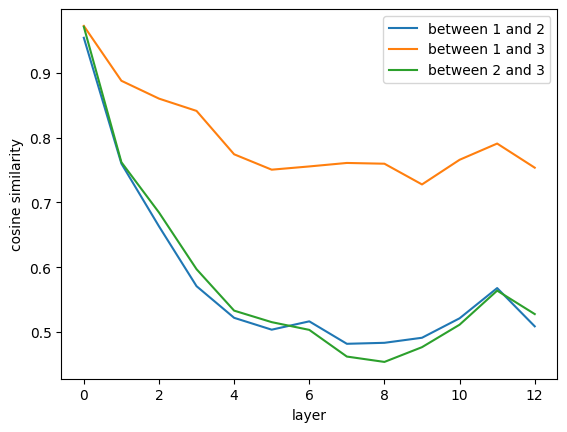

In [22]:
text1 = "We will rob a bank next week!"
text2 = "The children skipped stones by the bank of the river."
text3 = "I put money in the bank."
tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens1)
print(tokens2)
print(tokens3)

tokens_ids_of_interest = [5, 7, 6]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

<a name='e5'></a>
### Exercise 5 Evolution of embeddings

- (3p) Discuss the plots above. Are the plots showing what you expected to see?
- (1p) Take a look at the similarity between the word "bank" in the first example for the first layer (layer index 0)? This corresponds to the embedding layer of BERT. It is close to `1` but not exactly. Why is that?
- (3p) Plot and analyze the similarities between words "nice", "bad", and "lovely" in the sentences "The weather is nice today.", "The weather is bad today.", and "The weather is lovely today.". Comment on the results. Are the plots showing what you expected to see? 
- (3p) Try a different set of sentences and comment on the results.

1. As expected the word bank in each senetence starts off with a very strong similarity - after all its the same word. Over time we can observe how the embedding of bank in the context of sentence 2 deviates from the other 2 sentences rapidally. This is because BERT realizes that despite being the same word, the meaning and contextual use is very different. All this happens while the senetences 1 and 3 dont loose as much interconnected meaning, this is because the word bank in both cases is used as financial institution, They too however deviate from each other over time, which might be duo to how one is used in the context of crime and the other in the context as actually using bank as its meant to be, maybe the bank in the 3rd senetence is more of an abstract term for a instituioton where ur money is, while senetnce one is very much the physical building you can rob.

2. The slight initial difference might arise from possitional embedding, which differs between each sentence as the word bank appears at different indecies.

3. As expected the similarity between nice and lovelly start somewhat similar at ~0.4, and the grows as the model realizes its they are synonyms. A bit more unexpectedly though, the similarity between nice-bad and lovelly-bad, also increases, admitadelly from a worse initial condition but still grows over time to significant amount. This may be due to the fact that despite having an oposite meaning, literlly conveying the oposite emotions and facts, they are nonetheless related, in a way that they are offen used in similar context. Being an antonym they are after all similar to each other in all but some features and hence, the model also begins to capture that over time.

4. Bell example further shows the importance of possition on initial similarity between words clearly playing a role. The 2 cases with same index, match perfectly while the other 2 combinations start weaker. AS expecetd both similarities with bell peper fade off relativelly quickly, since its the only bell that doesnt make the ding dong sound. I am also proud of my homie BERT for realizing that my favourite fast food chain is not related to church as much as it initally had thought. However, the final climb in similarity, after hitting an all time low in leyer 9, makes me wonder if there is some underlying shady business going on between the 2 great institions, which is quite simply not humanly understandable, but I guess BERT is 2o dumb to uncover such a conspiracy theory. I shall go ahead and ask chatGPT now, BRB dingdong


bell
bell
bell


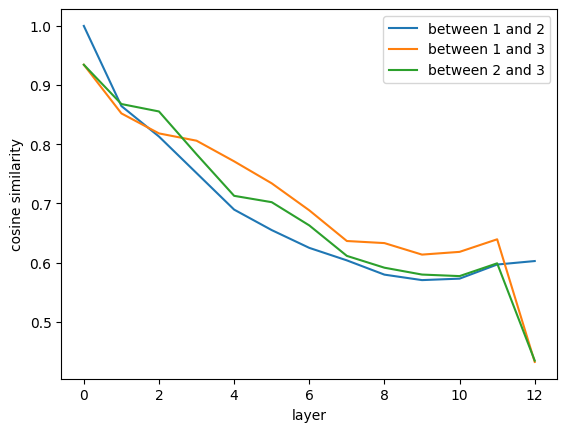

In [23]:
text1 = "Taco Bell ding dong."
text2 = "The Church bell wakes me up every fucking morning."
text3 = "bell peper is my favorite veggie."
tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
tokens_ids_of_interest = [3, 3, 1]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])
model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

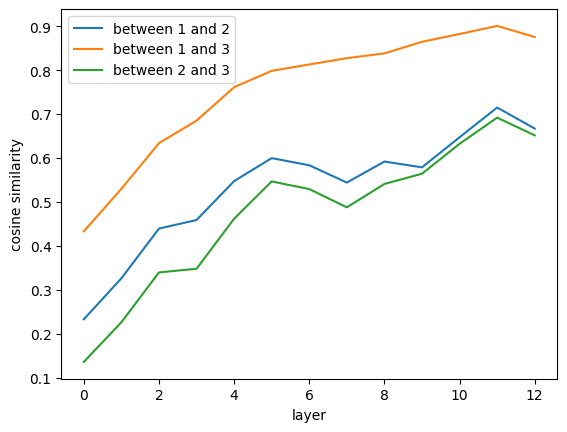

In [24]:
### YOUR CODE HERE

text1 = "The weather is nice today."
text2 = "The weather is bad today."
text3 = "The weather is lovely today."
tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
tokens_ids_of_interest = [4, 4, 4]
model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

### YOUR CODE ENDS HERE
### NOTICE: you can always add more cells if you need them

## 3. Calculating BERT sentence embeddings

It is finally time to use BERT's hidden states as word embeddings. First, you will write a function to aggregate the BERT's hidden representations of the words in a sentence.

<a name='e6'></a>
### Exercise 6 Implement sentence embeddings

(5p) Implement the following function. It will receive the batched input to the model and its output. Calculate the mean embedding of the tokens in each sentence. In particular, get `attention_mask` from the `input_batch` and `hidden_states` from `model_output` (already done for you), and calculate the mean of the hidden states. Remember that you are working with a batch, so both `attention_mask` and `hidden_states` contain multiple sentences (the first dimension of both tensors correspond to the size of the batch). In the end, you should have a tensor with a shape batch_size x embedding_size.

Pay attention to the padded tokens (indicated by the attention mask from the input).

Additionally, the function will receive the `layer` parameter. It will indicate the index of the layer of which the hidden representations of tokens will be aggregated. The default value of `-1` indicates the last layer. The code already selects the hidden states of the specified layer.

Optionally, you can ignore the special tokens `[CLS]` and `[SEP]`.

In [25]:
def calculate_sentence_embeddings(input_batch, model_output, layer=-1):
    """
    Calculates the sentence embeddings of a batch of sentences as a mean of token representations.
    The representations are taken from the layer of the index provided as a `layer` parameter.
    Args:
        input_batch: tokenized batch of sentences (as returned by the tokenizer), contains `input_ids`, `token_type_ids`, and `attention_mask` tensors
        model_output: the output of the model given the `input_batch`, contains `last_hidden_state`, `pooler_output`, `hidden_states` tensors
        layer: specifies the layer of the hidden states that are used to calculate sentence embedding

    Returns: tensor of the averaged hidden states (from the specified layer) for each example in the batch

    """
    attention_mask = input_batch['attention_mask']
    hidden_states = model_output['hidden_states'][layer]

    ### YOUR CODE HERE

    # average out the token representations in the last layer for each sentence, efficiently 
    # The attention mask is used to ignore the padding tokens in the input batch
    sentence_embeddings = torch.sum(hidden_states * attention_mask.unsqueeze(-1), dim=1) / torch.sum(attention_mask, dim=1).unsqueeze(-1)
    
    ### YOUR CODE ENDS HERE


    return sentence_embeddings

Let us try out the function.

In [26]:
text = "The weather is nice today."
tokenized = tokenizer(text, padding=True, return_tensors='pt').to(device)
print(tokenized)
model_output = model(**tokenized, output_hidden_states=True)
print(model_output['last_hidden_state'].shape)
sentence_embedding = calculate_sentence_embeddings(tokenized, model_output)
print(sentence_embedding.shape)

{'input_ids': tensor([[ 101, 1996, 4633, 2003, 3835, 2651, 1012,  102]], device='mps:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]], device='mps:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]], device='mps:0')}
torch.Size([1, 8, 768])
torch.Size([1, 768])


The following function will plot the evolution of cosine similarities between sentence embeddings based on representations of different layers of the model.

Notice that it will receive a function that is used to calculate the sentence embeddings (that is the function we implemented above).

In [27]:
def plot_evolving_sentence_similarities(input_batch, model_outputs, sentence_embeddings_fn):
    num_layers = len(model_outputs['hidden_states'])
    num_sentences = input_batch['input_ids'].shape[0]
    sentence_combinations = tuple(combinations(range(num_sentences), 2))
    similarities = [[] for _ in range(len(sentence_combinations))]

    for layer in range(num_layers):
        sentence_embeddings = sentence_embeddings_fn(input_batch, model_outputs, layer)
        for i, (sent1, sent2) in enumerate(sentence_combinations):
            embedding1 = sentence_embeddings[sent1]
            embedding2 = sentence_embeddings[sent2]
            cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=0)
            similarities[i].append(cosine_similarity.detach().cpu().numpy())

    for i, (sent1, sent2) in enumerate(sentence_combinations):
        plt.plot(range(num_layers), similarities[i], label=f'between {sent1 + 1} and {sent2 + 1}')

    plt.xlabel('layer')
    plt.ylabel('cosine similarity')
    plt.legend()
    plt.show()


Let's examine the cosine similarities of the sentences with the word "bank" from earlier.

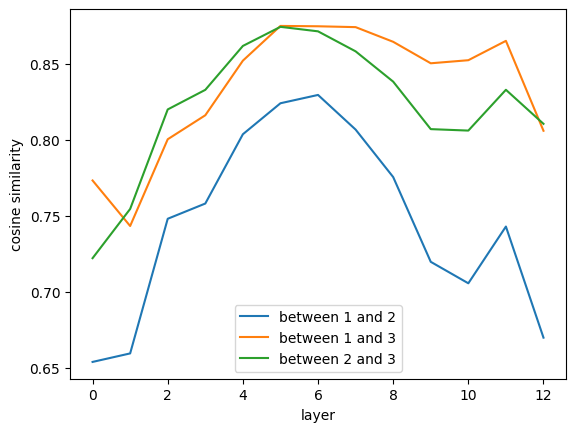

In [28]:
text1 = "We will rob a bank next week!"
text2 = "Let's put our savings into a bank account."
text3 = "We will steal some money from the bank."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

<a name='e7'></a>
### Exercise 7 Try different sentences

(10p) Try out your sentence embeddings on at least two different sets of sentences. Inspect the results in terms of the different layers. Comment on the results. Are they expected?

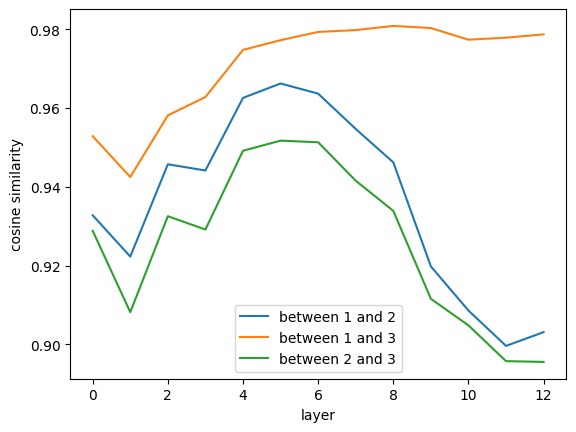

"\nGiven a strikingly similar sentence pairs, the similarity between the sentence embeddings should be high.\nWhat is interesting tough is how they start to deviate from each other slightly over time. \nInitially they all grow proportionally together. But at some point the model seems to 'grasp the underlying meaning' \nof the sentences and starts to diverge. While the possitive senetences are still close to each other, the oposit ones take a dive.\nIt make me wonder if its due to the initially local nature of the model, and how it learns to 'see' the bigger picture over time or\nsome other phenomena at play. \n"

In [29]:
### YOUR CODE HERE
text1 = "The weather is nice today."
text2 = "The weather is bad today."
text3 = "The weather is lovely today."
tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

"""
Given a strikingly similar sentence pairs, the similarity between the sentence embeddings should be high.
What is interesting tough is how they start to deviate from each other slightly over time. 
Initially they all grow proportionally together. But at some point the model seems to 'grasp the underlying meaning' 
of the sentences and starts to diverge. While the possitive senetences are still close to each other, the oposit ones take a dive.
It make me wonder if its due to the initially local nature of the model, and how it learns to 'see' the bigger picture over time or
some other phenomena at play. 
"""
### YOUR CODE ENDS HERE

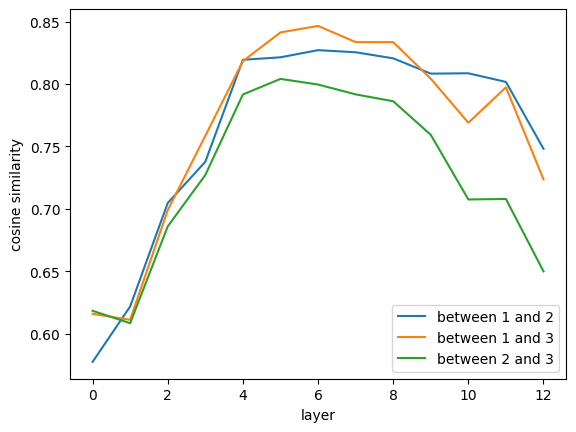

"\n    I asked chatGPT for pure jiberish unrelated words and these are what I got...\n    Honestly i have no clue why is the correlation so high between the sentences. Literlly no idea... I will try my best though :D\n    On one hand I understand they have the CLS and SEP tokens in common, \n    but on the other hand, the rest of the tokens are completely different, both the meaning (what meaniing????) and the words used.\n    I guess the model is still able to 'see' the bigger picture and understand that they are all just random words,\n    And maybe this complete lack of anything in common and lack of any meaning is what makes them similar.\n    One structural similarity I can see though is that they all describe something that happened in past tense, \n    and have similar sentence structure.\n\n    Its Nonetheless interesting to observe a~075 simmilarity score only based on similar structre of the senetence and common lack of meaning.\n"

In [30]:
text1 = "Pineapples attended a jazz funeral for obsolete calculators."
text2 = "Cabbages invented hip-hop to protest gravity."
text3 = "My shadow started knitting sweaters for invisible hamsters."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

"""
    I asked chatGPT for pure jiberish unrelated words and these are what I got...
    Honestly i have no clue why is the correlation so high between the sentences. Literlly no idea... I will try my best though :D
    On one hand I understand they have the CLS and SEP tokens in common, 
    but on the other hand, the rest of the tokens are completely different, both the meaning (what meaniing????) and the words used.
    I guess the model is still able to 'see' the bigger picture and understand that they are all just random words,
    And maybe this complete lack of anything in common and lack of any meaning is what makes them similar.
    One structural similarity I can see though is that they all describe something that happened in past tense, 
    and have similar sentence structure.
    
    Its Nonetheless interesting to observe a~075 simmilarity score only based on similar structre of the senetence and common lack of meaning.
"""

### 3.1 Applying BERT sentence embeddings

Next, we will be calculating the word embeddings on our dataset. This is the moment where having GPU will greatly speed up the computations but fast CPU should do just fine (you might have to wait couple of minutes for embedding the whole dataset).

As mentioned before, we can use Google Colab [https://colab.google/](https://colab.google/) for this purpose. It gives you access to a GPU for a limited time (after you used this time you will have to wait for some time to use it again). To use a GPU you need to select the runtime type. Go to "Runtime -> Change runtime type". There you can select a CPU or a GPU.

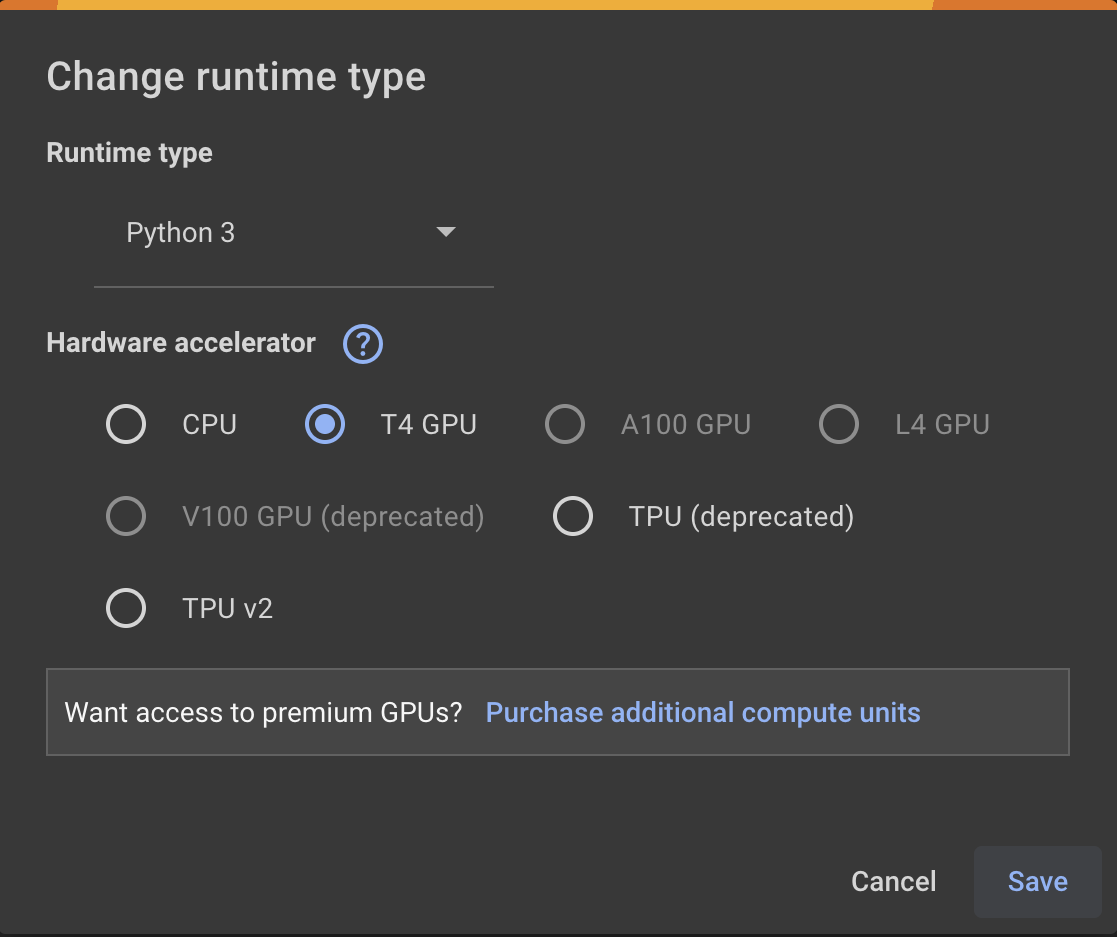

It might be a good idea to first work on a CPU with a slice of the dataset until your code works without problems. Then you can switch to a GPU runtime and work on the whole dataset. Notice that you will have to run all the cells again as the change of the runtime will effectively start a fresh session.

⚠️ **Disclaimer**: Google Colab provides free access to GPUs, but this comes with limitations. Sessions are time-limited (typically ~12 hours), resources are shared (you might not always get access to a GPU) and idle notebooks can be disconnected. If you're using Colab Pro or Pro+, the limits are more relaxed but still not unlimited. Be mindful of these constraints when planning long-running experiments or training large models. Since you're working in a group, you should be able to access up to 3 accounts — keep this in mind as you plan your work.

If you have a GPU locally, you don't need to do that, and you can work on the whole dataset from the get go.

To select a portion of the dataset uncomment the following cell. Make sure to comment it again when you are ready to run the notebook on the notebook on the GPU.

In [31]:
# test_ds = test_ds.select(range(5000))

<a name='e8'></a>
### Exercise 8 Tokenize sentence and compressed
(2p) We will first tokenize the dataset. Write two functions that will tokenize the two columns - `sentence` and `compressed` - separately. Do not use padding when tokenizing, as we will later use [DataCollator](https://huggingface.co/docs/transformers/en/main_classes/data_collator) to "pack and pad" the examples to form batches.

If you have any doubts please check the following [tutorial](https://huggingface.co/docs/datasets/use_dataset) on Huggingface.

In [36]:
def tokenize_sentence(examples):
    """
    Tokenizes the `sentence` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `sentence` column (returns the whole output of the tokenizer)

    """
    ### YOUR CODE HERE

    tokenized_sentence = tokenizer(examples['sentence'],truncation=True,max_length=512) # need to truncate as it causes an error later down the line: Token indices sequence length is longer than the specified maximum sequence length for this model (650 > 512). Running this sequence through the model will result in indexing errors,

    ### YOUR CODE ENDS HERE
    return tokenized_sentence


def tokenize_compressed(examples):
    """
    Tokenizes the `compressed` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `compressed` column (returns the whole output of the tokenizer)

    """

    ### YOUR CODE HERE

    tokenized_compressed = tokenizer(examples['compressed'],truncation=True,max_length=512) # doubt that there are any sentences longer than 512 tokens here

    ### YOUR CODE ENDS HERE
    return tokenized_compressed

In the next cell, we will apply the functions that you implemented on the dataset (using `map()` method). We will do it twice to obtain two separate datasets for full and compressed sentence each. Notice that we drop the original columns when we form the new datasets.

In [37]:
tokenized_sentence_ds = test_ds.map(tokenize_sentence, batched=True, remove_columns=['sentence', 'compressed'])
print(tokenized_sentence_ds)

tokenized_compressed_ds = test_ds.map(tokenize_compressed, batched=True, remove_columns=['sentence', 'compressed'])
print(tokenized_sentence_ds)

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 36000
})


Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 36000
})


Let's examine the first few examples from both datasets. Make sure that they make sense to you.

In [38]:
print(tokenized_sentence_ds[0:3])
print(tokenized_compressed_ds[0:3])

{'input_ids': [[101, 25957, 3900, 4276, 12667, 1016, 1012, 3963, 2474, 10023, 2038, 2042, 8243, 2013, 1037, 2158, 20540, 2004, 1037, 6398, 1997, 1037, 12454, 3679, 1010, 2610, 2056, 1012, 102], [101, 8955, 1010, 2233, 1023, 12127, 14841, 25494, 14235, 28144, 20922, 2758, 1996, 3739, 1997, 20868, 12881, 2319, 1999, 2010, 3152, 5260, 2032, 2000, 4339, 9313, 4933, 2004, 2002, 4282, 1996, 3364, 2064, 4139, 2125, 2505, 1012, 102], [101, 2006, 5095, 1010, 2047, 2259, 7230, 4389, 2203, 7441, 5213, 3240, 21795, 2008, 2002, 2453, 2025, 5463, 1996, 2136, 1005, 1055, 10915, 7163, 26468, 1010, 2029, 4269, 2006, 9317, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In the following cell you can find the function that will apply the provided sentence embedding function to the dataset. It uses the DataCollator we metioned earlier (you are welcome to check the documentation: [https://huggingface.co/docs/transformers/en/main_classes/data_collator](https://huggingface.co/docs/transformers/en/main_classes/data_collator)).

In [39]:
from torch.utils.data.dataloader import DataLoader

def embed_dataset(dataset, model, sentence_embedding_fn, batch_size=8):
    data_collator = transformers.DataCollatorWithPadding(tokenizer)
    data_loader = DataLoader(dataset, batch_size=batch_size, collate_fn=data_collator)
    sentence_embeddings = []
    with torch.no_grad():
        for batch in tqdm.tqdm(data_loader):
            batch.to(device)
            model_output = model(**batch, output_hidden_states=True)
            batch_sentence_embeddings = sentence_embedding_fn(batch, model_output)
            sentence_embeddings.append(batch_sentence_embeddings.detach().cpu())

    sentence_embeddings = torch.concat(sentence_embeddings, dim=0)
    return sentence_embeddings

We will embed the dataset containing sentences by using the function from the previous cell. We will pass your `calculate_sentence_embeddings` function. By default, this function uses the hidden representations of the last layer.

If you are not using a GPU this can take some time depending on your system and your implementation.

To use different layer you can pass different value for the `layer` parameter using python's `functools.partial` function ([https://docs.python.org/3/library/functools.html#functools.partial](https://docs.python.org/3/library/functools.html#functools.partial)).

In [40]:
sentence_embeddings = embed_dataset(tokenized_sentence_ds, model, calculate_sentence_embeddings)
print(sentence_embeddings.shape)

100%|██████████| 4500/4500 [01:06<00:00, 67.92it/s]

torch.Size([36000, 768])


The following cell will embed the compressed sentences. Make sure to pass the same function for calculating the sentence embeddings.

In [41]:
compressed_embeddings = embed_dataset(tokenized_compressed_ds, model, calculate_sentence_embeddings)
print(compressed_embeddings.shape)

100%|██████████| 4500/4500 [00:35<00:00, 125.95it/s]


torch.Size([36000, 768])


## 4. Retrieving Sentences

Guess what? We are going to try the same task/dataset as the previous lab and hopefully get better performance.

As a reminder, we will be using vector representations (based on the BERT embeddings) to retrieve only the relevant ones based on some user query. It is similar to the search retrieval task (based on what we discussed in the relevant lecture) where a user provides a query (that is the compressed sentence) and the system returns the sentences that are more similar to the query.

In the information retrieval lecture, we discussed how to solve this retrieval problem by using bag-of-words as a representation basis. In Lab 2, we solved the problem using static word embeddings (learned from our corpus) and by averaging their equivalent vectors per sentence. Now, we are going to use the BERT model (we loaded above) to get contextualized sentence embeddings! Are you as excited as we are?

<a name='e9'></a>
### Exercise 9 Embed query function

(1p) First step to a retrieval task is to embed the query (aka find a proper vector representation). We will do it the same way as we did it in the previous exercises. Complete the following function to return the embedding of the provided text.

In [168]:
def embed_query(query, sentence_embedding_fn):
    """
    Embeds the provided query using the model and the `sentence_embedding_fn` function
    Args:
        query: a str with the query
        sentence_embedding_fn: the function used to embed the sentence based on the input and output of the model

    Returns: a PyTorch tensor with the embedded query

    """

    #### YOUR CODE HERE


    query_tokenized =  tokenizer([query], truncation=True, max_length=512, return_tensors='pt') # not sure if it is necessary to truncate tho

    model_output = model(**query_tokenized, output_hidden_states=True)
    
    ### YOUR CODE ENDS HERE

    query_embedding = sentence_embedding_fn(query_tokenized, model_output)

    return query_embedding.detach().cpu()


Next we will embed the query (which is the same as in the previous lab). What is the dimensionality of the embedding?

In [146]:
query = "volcano erupted"
print(query)

device = torch.device("cpu")
model.to(device)

query_embedding = embed_query(query, calculate_sentence_embeddings) # this is from the first sentence embedding function
print(query_embedding.shape)
print(query_embedding[0][:10])

volcano erupted
torch.Size([1, 768])
tensor([-0.2441, -0.0432, -0.2323, -0.2977, -0.0265, -0.4353,  0.7683,  0.6776,
        -0.0209,  0.2026])


<a name='e10'></a>
### Exercise 10 Cosine similarity 1 to n in PyTorch

(3p) The next step in our retrieval system, would be to calculate the proximity of a query to our retrieval corpus (in our case that is all the sentences).

Complete the following function to calculate the cosine similarity between a vector (first parameter `vector`, that will usually be the query vector) and all other vectors (second parameter `other_vectors`, that will be the sentence embeddings in our case).

The corresponding function from the previous lab would actually work without changes, as PyTorch's tensors are automatically cast into numpy arrays. That said, convert the function into PyTorch to see how the two libraries are similar to each other.

Note that the `other_vectors` parameter is a single PyTorch tensor of size `N x D`, where $N$ is the number of vectors and $D$ is the dimension of each vector.

In [163]:
import torch.nn.functional as F

def cosine_similarity_1_to_n(vectors, other_vectors):
    """
    Calculates the cosine similarity between a single vector and other vectors.
    Args:
        vector: a tensor representing a vector of D dimensions
        other_vectors: a 2D tensor representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a 1D numpy array of size N containing the cosine similarity between the vector and all the other vectors

    """

    #### YOUR CODE HERE

    vector_norm = F.normalize(vectors, p=2, dim=0).unsqueeze(1) # unsqueeze cuz apparently pytorch makes (D,) vectors have no extra dimension
    other_norm = F.normalize(other_vectors, p=2, dim=1)
    similarity = torch.mm(other_norm, vector_norm).squeeze() # result is a (1,N) vector so to get it back to (N,) you squeeze again

    return similarity

    ### YOUR CODE ENDS HERE

We will use the function to calculate the similarity of all sentences in the dataset to our query.

In [164]:
query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)
print(query_similarity.shape)
print(query_similarity[:10])

torch.Size([36000])
tensor([0.4728, 0.3638, 0.3444, 0.4864, 0.4289, 0.4711, 0.4248, 0.2919, 0.3920,
        0.3898])


The following cell will select the most similar sentence.

In [129]:
most_similar = int(np.argmax(query_similarity))
print(most_similar)
print(query_similarity[most_similar])
print(test_ds[most_similar]['sentence'])

17435
tensor(0.6143)
Fire gutted a Holland home early Saturday morning.


The following function will return the indices of the top-k elements in the array.

In [130]:
def top_k_indices(array, k, sorted=True):
    """
    Returns top-k indices from the 1D array. If `sorted` is `True` the returned indices are sorted in the descending order
    Args:
        array: a 1D numpy array
        k: a number of top indices to return
        sorted: if True, the returned indices are sorted in descending order

    Returns: a 1D array containing top-k indices

    """
    top_k = np.argpartition(array, -k)[-k:]
    if sorted:
        selected = array[top_k]
        sorted_selected = (-selected).argsort()
        top_k = top_k[sorted_selected]
    return top_k

In [131]:
top_indices = top_k_indices(query_similarity, k=10).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

Fire gutted a Holland home early Saturday morning.
similarity: 0.614275336265564
Fire destroyed a home near Lindale Wednesday night.
similarity: 0.6092610955238342
Wind causes problems during house fire fight near SW 52nd and Monte.
similarity: 0.60764479637146
An Indonesian volcano has spewed more hot ash & debris into the air, sending villagers fleeing.
similarity: 0.6016837358474731
Education Department fined $50,000 over school accident which left a teenage girl with permanent injuries.
similarity: 0.5908318758010864
Bus hits UT student during foam sword fight.
similarity: 0.5894040465354919
Residents were evacuated near the Markarfljot river Thursday after volcanic eruption melted glaciers and caused flooding in southern Iceland.
similarity: 0.5872467756271362
economy added few jobs in January as stormy weather likely kept people out of work.
similarity: 0.586837649345398
Cass County administrator Plead guilty to DWI charge from Sept. 3 incident
similarity: 0.5832548141479492
Magn

<a name='e11'></a>
### Exercise 11 Experiment with different queries

(10p) Experiment with different queries (taking into account the nature of the dataset and your insights from the analysis so far).
Try at least 5 different queries and analyze top 5 most similar responses. 

Does the search perform well? When does it fail? Provide reasons for the good/bad result in each case. 

Optionally, if you completed the previous lab, try the examples from that case. What do you observe?

In [158]:
#### YOUR CODE HERE
query = ("volcano erupted")
query_embedding = embed_query(query, calculate_sentence_embeddings)
query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)
top_indices = top_k_indices(query_similarity, k=20).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

# "volcano erupted" I find the results for this query very weird, as there are articles mentioning volcanoes but those are not the most similar, 3 articles are apparently more similar, although they are not, no idea why, probably something to do with the model, honestly the issue with such much models is low interpretability sure it performs well but now i wondering why and for unexpected results im completely dumbfounded.
#Results
# Fire gutted a Holland home early Saturday morning.
# similarity: 0.614275336265564
# Fire destroyed a home near Lindale Wednesday night.
# similarity: 0.6092610955238342
# Wind causes problems during house fire fight near SW 52nd and Monte.
# similarity: 0.60764479637146
# An Indonesian volcano has spewed more hot ash & debris into the air, sending villagers fleeing.
# similarity: 0.6016837358474731
# Education Department fined $50,000 over school accident which left a teenage girl with permanent injuries.
# similarity: 0.5908318758010864


# "apple tarts are very delicious" returns food related content, but in a very different context, most probably there are few texts or none like the one in the query
# Paua is a New Zealand summer delicacy.
# similarity: 0.6933307647705078
# McDonald's Corp. says it is adding apple slices to every Happy Meal.
# similarity: 0.6911187767982483
# That charbroiled burger may be delicious but it is polluting the air you breathe.
# similarity: 0.6762517690658569
# This is the first month of fall, and the fall vegetables will soon be ready for harvest -- turnips, mustard greens, pumpkins, etc.
# similarity: 0.6679164171218872
# McDonald's adds chicken McWrap to core menu McDonald's is adding a permanent new offering to its menu: chicken McWraps.
# similarity: 0.6474165916442871

# "natural disaster, lots of people dead, and fluffy happy unicorns" the first result is honestly as good as it gets, especially given this conflicting and weird query, find the right set of associations and matched based off of that
# A seventh-grade girl sent a Hello Kitty doll into near space for a science project, upstaging baking soda volcanoes worldwide.
# similarity: 0.7289383411407471
# A man has been caught at Bangkok airport with live baby animals in his luggage, including panthers, leopards, and a baby bear.
# similarity: 0.708211362361908
# A Grover Beach woman is upset and she says her tiny dog was mauled by a pit bull in Oceano.
# similarity: 0.7070236206054688
# A policeman was trapped in his patrol car by 50,000 bees, which had escaped from a crashed truck, enabling journalists everywhere to make jokes about him needing a Swat team.
# similarity: 0.7066442966461182
# St. Louis based Build-A-Bear is recalling 300,000 teddy bears, because their eyes could pop out and children could choke on them.
# similarity: 0.7060211300849915

# "something happened somewhere" vague query results in a vast array of different articles, which is to be expected
# Where did the American higher education system go wrong?
# similarity: 0.5814255475997925
# Fire gutted a Holland home early Saturday morning.
# similarity: 0.5677361488342285
# A car somehow caught fire inside an auto repair shop in southwest Houston overnight.
# similarity: 0.5632612109184265
# This is just the beginning of changes to health care.
# similarity: 0.560670793056488
# A Lancaster jewelry store is giving back.
# similarity: 0.5603142976760864

#"celebrity so and so, broke up with the dashing and handsome celebrity, how could this be? Will they ever get back together?" The search recognised that the query was about celebrities and relationships, although the query mentions a break-up the most similar texts ended up being those where celebrities got engaged or together, the opposite similarity is very evident here, clusters on topical similarity.
# Leah Messer is not only newly engaged, but she's also expecting many more good things with her fiance, Jeremy Calvert: he proposed on Christmas Day AND the Teen Mom 2 star is pregnant with her third child!
# similarity: 0.8326599597930908
# This video Why must I declare any current plans to remarry or live with a new partner? is from the series Financial Implications After Divorce
# similarity: 0.8104134798049927
# After tragically losing her former fiance in the 2004 Tsunami supermodel Petra Nemcova is finally happy again, The 31-year-old model is now engaged to be married to British actor Jamie Belman.
# similarity: 0.7953574657440186
# LOVESTRUCK Ashley Cole has begged ex-wife Cheryl to ``come away with me'' and start a new life in Spain.
# similarity: 0.7953290343284607
# BRISTOL Palin and Levi Johnston say they're engaged and hope to get married within six weeks, an abrupt turnaround for the couple that just months ago was fighting over child support and Mr Johnston's critical comments about the family.
# similarity: 0.7915570735931396

#"can flamingos play cards whilst cooking?'Honey the phone is ringing!'" A nonsense query also results in a nonsensical search, matching pretty randomly, seem match the texts based on the structure.

#"the gap between rich and poor, grows ever more"  pretty decent match: "The last paragraph explained: ``In the midst of this crisis, the rich are getting richer and the poor are getting poorer. Millions of middle class citizens have joined the ranks of poverty. The gap between the rich and poor is deepening every day.''". However after the next most similar texts are regarding are about financial or monetary topics but miss the context.

#"Alice in wonderland, is about cocaine use", "a query about heavy drugs, cocaine users","cocaine" ok more words to give context the better the search performs, cocaine on its own somehow pretty useless but the more logical context is given the better, also interestingly with Alice in Wonderland the search turned up celebrities and drug use.

# British punk rocker Billy Idol is writing his memoir and promises not to hold back on the details about drugs, booze and women.
# similarity: 0.676876425743103
# Drew Barrymore talks about love and phone sex in the UK edition of Marie Clare.
# similarity: 0.6766432523727417
# Lindsay Lohan is being sued again, this time for allegedly taking a fur coat.
# similarity: 0.6733492612838745
# A play in theatres across the pond features a monologue from Lance Armstrong.
# similarity: 0.6686158776283264
# Fiona Apple was arrested in Texas on drug possession charges, TMZ reports.
# similarity: 0.667614758014679

# Heroin and cocaine addicts on treatment programmes are given drugs as a reward for clean urine samples.
# similarity: 0.7342352867126465
# Drug dealers are being paid by a London council to answer questions about their illegal trade.
# similarity: 0.729698657989502
# HEB is recalling some pills in connection with a voluntary recall from drug provider Perrigo.
# similarity: 0.7085939645767212
# British punk rocker Billy Idol is writing his memoir and promises not to hold back on the details about drugs, booze and women.
# similarity: 0.6983192563056946
# A woman who was arrested for possessing amphetamine uses the drug ``to stay awake on a night out'', according to her lawyer.
# similarity: 0.6972030997276306

# Christian home based business;
# similarity: 0.599228024482727
# reminders that politics can be fun.
# similarity: 0.5597832798957825
# The Apple Store is down for maintenance.
# similarity: 0.5525350570678711
# Greek police have smashed a doughnut crime ring.
# similarity: 0.5432934761047363
# Chafee to sell Barnes St. home.
# similarity: 0.5413984060287476

#"money" hilariously the query for money spits outs 4 of the texts that cocaine got.

# Christian home based business;
# similarity: 0.5264885425567627
# Chafee to sell Barnes St. home.
# similarity: 0.5177773237228394
# reminders that politics can be fun.
# similarity: 0.4852621257305145
# The Apple Store is down for maintenance.
# similarity: 0.4775184690952301
# Jessica Alba is completely useless.

#"tumor" yeah definitely a pattern

# Chafee to sell Barnes St. home.
# similarity: 0.47918298840522766
# Christian home based business;
# similarity: 0.4767274558544159
# Saga'' movies, says vampires are very sexy.
# similarity: 0.4358134865760803
# The Apple Store is down for maintenance.
# similarity: 0.43503260612487793
# Jessica Alba is completely useless.
# similarity: 0.4266628921031952

#"Neisseria forms diploids, streptococci form chains, and staphylococci group together in grape-like clusters" search turns up boi-medical texts pretty cool, same for science queries in general "a non newtonian liquid has both properties of liquids and solids", although probably very unrelated to the specific domain and meaning it seems better, as this feels mor obscure so recognising what overarching field or topic the text belongs to especially in specialised material


### YOUR CODE ENDS HERE

Fire gutted a Holland home early Saturday morning.
similarity: 0.614275336265564
Fire destroyed a home near Lindale Wednesday night.
similarity: 0.6092610955238342
Wind causes problems during house fire fight near SW 52nd and Monte.
similarity: 0.60764479637146
An Indonesian volcano has spewed more hot ash & debris into the air, sending villagers fleeing.
similarity: 0.6016837358474731
Education Department fined $50,000 over school accident which left a teenage girl with permanent injuries.
similarity: 0.5908318758010864
Bus hits UT student during foam sword fight.
similarity: 0.5894040465354919
Residents were evacuated near the Markarfljot river Thursday after volcanic eruption melted glaciers and caused flooding in southern Iceland.
similarity: 0.5872467756271362
economy added few jobs in January as stormy weather likely kept people out of work.
similarity: 0.586837649345398
Cass County administrator Plead guilty to DWI charge from Sept. 3 incident
similarity: 0.5832548141479492
Magn

## 5. Evaluating Retrieval

In this section (as with the previous lab) we will try to evaluate how good our sentence retrieval system is. To keep the computational resources manageable, we will use the test set for that as its size is more manageable.

Recall from the lecture in IR that there are several metrics to evaluate retrieval performance by taking into account the relevance of the retrieved results to the query. We will use Recall@K here (for more metrics and more details refer to the lecture slides and the textbooks).

RRecall@K is a metric used to measure the effectiveness of a search system in retrieving relevant documents within the top $K$ retrieved documents. It calculates the proportion of relevant documents retrieved within the top-$K$ results, compared to the total number of relevant documents in the collection.

$
\text{Recall@K} = \frac{\text{Number of relevant documents retrieved in the top }-K}{\text{Total number of relevant documents}}
$

In our case, we have a sentence, and it's compressed version. To test our system, we will treat compressed sentences as the queries. Each query will have only a single relevant sentence - the corresponding uncompressed sentence.

Therefore, for the calculation of Recall@K we will take into account whether the correct retrieved result is contained within the first $K$ retrieved results. For example, if for a query (i.e. a compressed sentence) we retrieve 10 results and within these we see the relevant one (i.e. the full sentence), then Recall@10 = 1.

<a name='e12'></a>
### Exercise 12 Cosine similarity m to n in PyTorch

(3p) In this exercise you will revisit your implementation of the cosine siliarity. Generalize it so that it can accept two PyTorch tensors containing two sets of vectors (first one containing $M$ vectors and the second one $N$ vectors). Compute the cosine similarity between each pair of vectors coming from the two sets. The result should be a tensor of size $M x N$.

Once again, try to write an efficient code. This means no loops. Remember the relation between matrix multiplication and dot product. (Depending on your implementation of the previous function calculating cosine similarity, this one can be almost the same)

In [165]:
def cosine_similarity_m_to_n(vectors, other_vectors):
    """
    Calculates the cosine similarity between a multiple vectors and other vectors.
    Args:
        vectors: a numpy array representing M number of vectors of D dimensions (of the size MxD)
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a numpy array of cosine similarity between all the vectors and all the other vectors

    """

    #### YOUR CODE HERE

    vectors_norm = vectors / (vectors.norm(dim=1, keepdim=True) + 1e-10)
    other_vectors_norm = other_vectors / (other_vectors.norm(dim=1, keepdim=True) + 1e-10)

    similarity = torch.matmul(vectors_norm, other_vectors_norm.T)

    # vector_norm = F.normalize(vectors, p=2, dim=1)
    # other_norm = F.normalize(other_vectors, p=2, dim=1)
    # similarity = torch.mm(vector_norm, other_norm.T)

    return similarity

    ### YOUR CODE ENDS HERE

The following function will use your implementation to calculate Recall@K based on the similarity matrix.

In [169]:
def calculate_recall(queries, sentences, k, batch_size=1000):
    """
    Calculates recall@k given the embeddings of the queries and sentences.
    Assumes that only a single sentence with the same index as query is relevant.
    Batching is implemented to avoid high memory usage.
    Args:
        queries: a numpy array with the embeddings of N queries
        sentences: a numpy array with the embeddings of N sentences available for retrieval
        k: number of top results to search for the relevant sentence
        batch_size: number of queries to process at a time

    Returns: calculated recall@k

    """
    n_queries = queries.shape[0]
    correct = np.zeros(n_queries, dtype=bool)

    with tqdm.tqdm(total=n_queries) as pbar: # taqaddum (progress in arabic) => tqdm is just the progress bar lmaooo
        for batch_start in range(0, n_queries, batch_size):
            batch_end = min(batch_start + batch_size, n_queries)
            queries_batch = queries[batch_start:batch_end]
            batch_similarity = cosine_similarity_m_to_n(queries_batch, sentences)

            for i, similarity_row in enumerate(batch_similarity):
                query_index = batch_start + i
                top_k = top_k_indices(similarity_row, k=k, sorted=False)

                if query_index in top_k:
                    correct[query_index] = True

                pbar.update(1)

    recall = np.sum(correct) / n_queries
    return recall

You can use it like so:

In [170]:
recall_at_1 = calculate_recall(compressed_embeddings, sentence_embeddings, k=1, batch_size=1000)
print(f'\n{recall_at_1 * 100:.2f}%')

100%|██████████| 36000/36000 [00:06<00:00, 5647.83it/s]



46.61%


<a name='e13'></a>
### Exercise 13 Recal for different k-s

Calculate recall for different values of $K$ (at least 5 different values). Comment on how recall changes based on the value of $K$. Are the results expected or surprising? At this stage, do not experiment further. That will come in the next Sections which are more open ended.

In [138]:
#### YOUR CODE HERE
# recall_at_1 = calculate_recall(compressed_embeddings, sentence_embeddings, k=5, batch_size=1000)
# print(f'\n{recall_at_1 * 100:.2f}%')

ks=[1,5,10,50,100,500,1000,5000]
recalls = []

for k in ks:
    r = calculate_recall(compressed_embeddings, sentence_embeddings, k=k)
    recalls.append(r)




### YOUR CODE ENDS HERE

100%|██████████| 36000/36000 [00:10<00:00, 3312.36it/s]


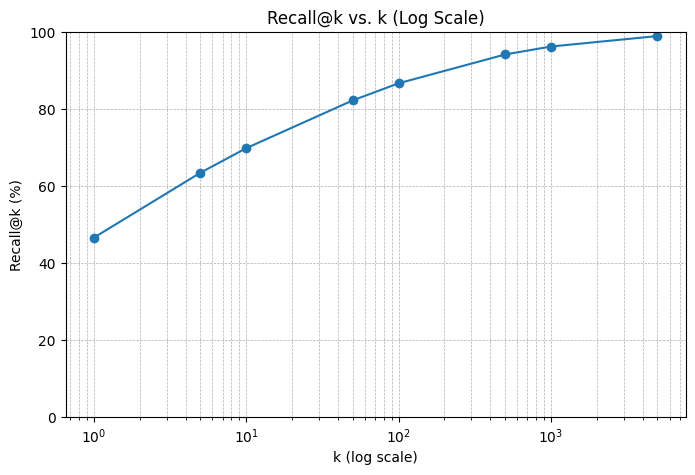

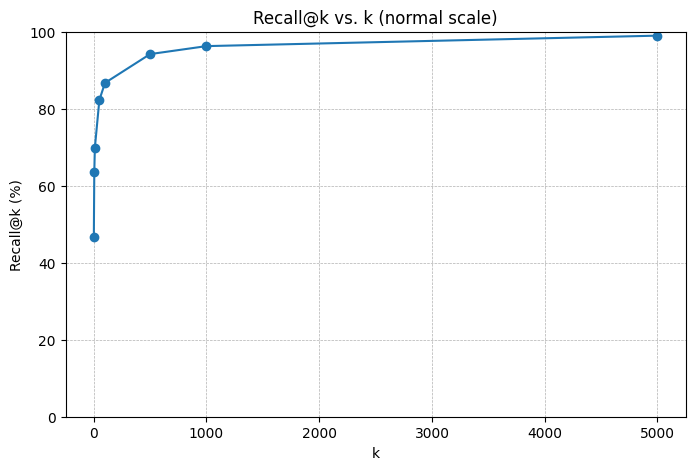

In [142]:
def plot_recall_curve_log(ks, recalls):
    plt.figure(figsize=(8, 5))
    plt.plot(ks, [r * 100 for r in recalls], marker='o')
    plt.xscale('log')
    plt.title("Recall@k vs. k (Log Scale)")
    plt.xlabel("k (log scale)")
    plt.ylabel("Recall@k (%)")
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.ylim(0, 100)
    plt.show()

def plot_recall_curve(ks, recalls):
    plt.figure(figsize=(8, 5))
    plt.plot(ks, [r * 100 for r in recalls], marker='o')
    plt.title("Recall@k vs. k (normal scale)")
    plt.xlabel("k (log scale)")
    plt.ylabel("Recall@k (%)")
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.ylim(0, 100)
    plt.show()


plot_recall_curve_log(ks, recalls)
plot_recall_curve(ks, recalls)

## 6. Pushing the performance: Modifying the sentence embeddings


<a name='e14'></a>
### Exercise 14 Different ways of embedding sentences

(10p) Experiment with the way the sentence embedding is calculated and check performance on the task. For example, you can try using the embedding of the `CLS` token or averaging the hidden states of different layer or even averaging the representations of several layers. The choice is yours, but make sure to give a justification of your choice, based on the results and your inspection of the dataset. 

Inspect the representations of tokens and sentences.

Evaluate the modification on the sentence retrieval task.

In [283]:
#### YOUR CODE HERE
def get_sentence_embeddings_adapted(input_batch, model_output, method, layers=None):

    attention_mask = input_batch["attention_mask"]

    if method == "cls":
        return model_output.last_hidden_state[:, 0, :]

    elif method == "cls_hybrid":
        hidden_states = model_output['hidden_states'][-1]
        sentence_embeddings = (torch.sum(hidden_states * attention_mask.unsqueeze(-1), dim=1) + model_output.last_hidden_state[:, 0, :])  / (torch.sum(attention_mask, dim=1).unsqueeze(-1) +1)
        return sentence_embeddings

    elif method == "mean_layers":
        all_hidden = model_output.hidden_states
        if isinstance(layers, int):
            layers = list(range(-layers, 0))
        selected = torch.stack([all_hidden[i] for i in layers])
        mean_hidden = selected.mean(0)
        return (mean_hidden * attention_mask.unsqueeze(-1)).sum(1) / attention_mask.sum(1, keepdim=True)

    elif method == "max":
        all_hidden = model_output.hidden_states
        layers = list(range(-12, 0))
        selected = torch.stack([all_hidden[i] for i in layers])
        max_hidden, _ = selected.max(0)
        return (max_hidden * attention_mask.unsqueeze(-1)).max(1).values


def embed_dataset2(dataset, model, sentence_embedding_fn, method, layers=None,batch_size=8):
    data_collator = transformers.DataCollatorWithPadding(tokenizer)
    data_loader = DataLoader(dataset, batch_size=batch_size, collate_fn=data_collator)
    sentence_embeddings = []
    with torch.no_grad():
        for batch in tqdm.tqdm(data_loader):
            batch.to(device)
            model_output = model(**batch, output_hidden_states=True)
            batch_sentence_embeddings = sentence_embedding_fn(batch, model_output, method=method, layers=layers)
            sentence_embeddings.append(batch_sentence_embeddings.detach().cpu())

    sentence_embeddings = torch.concat(sentence_embeddings, dim=0)
    return sentence_embeddings

def embed_query(query, sentence_embedding_fn, method, layers=None):

    query_tokenized =  tokenizer([query], truncation=True, max_length=512, return_tensors='pt') # is it necessary to truncate tho?

    model_output = model(**query_tokenized, output_hidden_states=True)

    query_embedding = sentence_embedding_fn(query_tokenized, model_output, method=method, layers=layers)

    return query_embedding.detach().cpu()


### YOUR CODE ENDS HERE

In [148]:
sentence_embeddings_cls = embed_dataset2(tokenized_sentence_ds, model, get_sentence_embeddings_adapted, method="cls", layers=None)
compressed_embeddings_cls = embed_dataset2(tokenized_compressed_ds, model, get_sentence_embeddings_adapted, method="cls", layers=None)

sentence_embeddings_cls_hybrid = embed_dataset2(tokenized_sentence_ds, model, get_sentence_embeddings_adapted, method="cls_hybrid", layers=None)
compressed_embeddings_cls_hybrid = embed_dataset2(tokenized_compressed_ds, model, get_sentence_embeddings_adapted, method="cls_hybrid", layers=None)

sentence_embeddings_last2 = embed_dataset2(tokenized_sentence_ds, model, get_sentence_embeddings_adapted, method="mean_layers", layers=2)
compressed_embeddings_last2 = embed_dataset2(tokenized_compressed_ds, model, get_sentence_embeddings_adapted, method="mean_layers", layers=2)

sentence_embeddings_last4 = embed_dataset2(tokenized_sentence_ds, model, get_sentence_embeddings_adapted, method="mean_layers", layers=4)
compressed_embeddings_last4 = embed_dataset2(tokenized_compressed_ds, model, get_sentence_embeddings_adapted, method="mean_layers", layers=4)

sentence_embeddings_last6 = embed_dataset2(tokenized_sentence_ds, model, get_sentence_embeddings_adapted, method="mean_layers", layers=6)
compressed_embeddings_last6 = embed_dataset2(tokenized_compressed_ds, model, get_sentence_embeddings_adapted, method="mean_layers", layers=6)

100%|██████████| 4500/4500 [04:02<00:00, 18.59it/s]


In [274]:
sentence_embeddings_last9 = embed_dataset2(tokenized_sentence_ds, model, get_sentence_embeddings_adapted, method="mean_layers", layers=9)
compressed_embeddings_last9 = embed_dataset2(tokenized_compressed_ds, model, get_sentence_embeddings_adapted, method="mean_layers", layers=9)

100%|██████████| 4500/4500 [03:23<00:00, 22.15it/s]


In [279]:
sentence_embeddings_12 = embed_dataset2(tokenized_sentence_ds, model, get_sentence_embeddings_adapted, method="mean_layers", layers=12)
compressed_embeddings_12 = embed_dataset2(tokenized_compressed_ds, model, get_sentence_embeddings_adapted, method="mean_layers", layers=12)

100%|██████████| 4500/4500 [03:19<00:00, 22.54it/s]


In [284]:
sentence_embeddings_max = embed_dataset2(tokenized_sentence_ds, model, get_sentence_embeddings_adapted, method="max")
compressed_embeddings_max = embed_dataset2(tokenized_compressed_ds, model, get_sentence_embeddings_adapted, method="max")

100%|██████████| 4500/4500 [03:14<00:00, 23.17it/s]


In [272]:
query = "volcano erupted"
query_embedding = embed_query(query, get_sentence_embeddings_adapted, method="cls")
query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings_cls)
top_indices = top_k_indices(query_similarity, k=20).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

The Glanbrook animal control position is going out to tender.
similarity: 0.8070849776268005
The state of emergency for the Nechako River ice jam has come to an end.
similarity: 0.8066139817237854
An early morning fire destroyed an Ovett home Sunday.
similarity: 0.8056191205978394
Unemployment claims drop sharply & Sage Grouse Initiative.
similarity: 0.8038755059242249
Jesse James' Spike TV reality show Jesse James Is A Dead Man has been canceled!
similarity: 0.8034269213676453
Newsday > News > Nation White House calls for Syria trade embargo Published:
similarity: 0.8027092218399048
A 6.0 magnitude earthquake shook in Northern Italy near the city of Bologna today causing death and widespread damage of buildings.
similarity: 0.8016223311424255
Fire destroyed a home near Lindale Wednesday night.
similarity: 0.8014342784881592
Popular online reviews site Yelp is going public, the latest in a slew of Internet businesses to do so.
similarity: 0.8000823259353638
Part of a historic wall is i

In [273]:
query = "volcano erupted"
query_embedding = embed_query(query, get_sentence_embeddings_adapted, method="cls_hybrid")
query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings_cls_hybrid)
top_indices = top_k_indices(query_similarity, k=20).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

Fire destroyed a home near Lindale Wednesday night.
similarity: 0.6219632625579834
Fire gutted a Holland home early Saturday morning.
similarity: 0.614126980304718
Wind causes problems during house fire fight near SW 52nd and Monte.
similarity: 0.6012135744094849
Unemployment claims drop sharply & Sage Grouse Initiative.
similarity: 0.5940957069396973
National Seminar on enforcement of cyber laws got underway here today.
similarity: 0.577842116355896
Cass County administrator Plead guilty to DWI charge from Sept. 3 incident
similarity: 0.5768685340881348
150 feet of copper pipe was stolen from a Lebanon County basement.
similarity: 0.576201319694519
Two men were killed in accidents since Tuesday.
similarity: 0.5744381546974182
A MAN has died in a house fire in southwest NSW.
similarity: 0.5736663937568665
An early morning fire destroyed an Ovett home Sunday.
similarity: 0.5730147957801819
Chafee to sell Barnes St. home.
similarity: 0.5715631246566772
An Indonesian volcano has spewed mo

In [319]:
query = "volcano erupted"
query_embedding = embed_query(query, get_sentence_embeddings_adapted, method="mean_layers", layers=4)
query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings_last4)
top_indices = top_k_indices(query_similarity, k=20).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

Wind causes problems during house fire fight near SW 52nd and Monte.
similarity: 0.6890639662742615
Bus hits UT student during foam sword fight.
similarity: 0.6675703525543213
Fire destroyed a home near Lindale Wednesday night.
similarity: 0.660500168800354
Education Department fined $50,000 over school accident which left a teenage girl with permanent injuries.
similarity: 0.6541663408279419
Cass County administrator Plead guilty to DWI charge from Sept. 3 incident
similarity: 0.645675539970398
Unemployment claims drop sharply & Sage Grouse Initiative.
similarity: 0.6350319385528564
An Indonesian volcano has spewed more hot ash & debris into the air, sending villagers fleeing.
similarity: 0.6331347227096558
Newsday > Sports > Baseball Alfredo Simon acquitted in shooting death Published:
similarity: 0.6285308599472046
Shark attacks at Surfside Beach, Texas, leaving a teenager injured, but OK.
similarity: 0.6261841058731079
Mumbaikars experienced light rain shower and cold wind waves sc

In [317]:
query = "volcano erupted"
query_embedding = embed_query(query, get_sentence_embeddings_adapted, method="mean_layers", layers=12)
query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings_12)
top_indices = top_k_indices(query_similarity, k=20).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

An Indonesian volcano has spewed more hot ash & debris into the air, sending villagers fleeing.
similarity: 0.7306997179985046
Lava from Kilauea volcano has forced the evacuation of a Big Island couple and their dogs.
similarity: 0.7233235836029053
Big Island police are investigating two shooting incidents in Volcano late Tuesday.
similarity: 0.7148428559303284
Residents were evacuated near the Markarfljot river Thursday after volcanic eruption melted glaciers and caused flooding in southern Iceland.
similarity: 0.7128087282180786
Wind causes problems during house fire fight near SW 52nd and Monte.
similarity: 0.7127032279968262
Fire destroyed a home near Lindale Wednesday night.
similarity: 0.7074342966079712
A retirement home was evacuated after lightning struck the building and started a smoldering fire.
similarity: 0.6995573043823242
A volcano in the Galapagos islands spewed molten lava, threatening 100-year-old giant tortoises living around the crater, island officials say.
simila

In [316]:
query = "volcano erupted"
query_embedding = embed_query(query, get_sentence_embeddings_adapted, method="max")
query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings_max)
top_indices = top_k_indices(query_similarity, k=20).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

An Alaskan volcano erupted three times this past Saturday, causing the Alaska Volcano Observatory to change its aviation color code to ``Orange'' from ``Yellow.''
similarity: 0.9024593234062195
A man was killed Wednesday while sliding down a snowy slope on Mt.
similarity: 0.9021404981613159
Lava from Kilauea volcano has forced the evacuation of a Big Island couple and their dogs.
similarity: 0.9018741846084595
A volcano in the Galapagos islands spewed molten lava, threatening 100-year-old giant tortoises living around the crater, island officials say.
similarity: 0.901421308517456
Four construction workers were killed and two injured in China yesterday when a temporary shed collapsed at a residential building site.
similarity: 0.9012585878372192
Japan plans to dump 11,500 tonnes of radioactive water at sea to free up storage space at its crippled Fukushima Daiichi nuclear plant for more highly contaminated water, the plant's operator said Monday.
similarity: 0.900664210319519
Washingto

In [149]:
ks=[1,5,10,50,100]
def recall_for_diff_k(ks,c_embeddings, s_embeddings):
    recalls = []
    for k in ks:
        r = calculate_recall(c_embeddings, s_embeddings, k=k)
        recalls.append(r)
    return recalls

methods = [
    ("cls", sentence_embeddings_cls, compressed_embeddings_cls),
    ("cls_hybrid", sentence_embeddings_cls_hybrid, compressed_embeddings_cls_hybrid),
    ("last2", sentence_embeddings_last2, compressed_embeddings_last2),
    ("last4", sentence_embeddings_last4, compressed_embeddings_last4),
    ("last6", sentence_embeddings_last6, compressed_embeddings_last6),
]

results = {}

for name, s_embed, c_embed in methods:
    recalls = recall_for_diff_k(ks, c_embed, s_embed)
    results[name] = recalls


100%|██████████| 36000/36000 [00:09<00:00, 3781.85it/s]


In [276]:
results["original"] = recall_for_diff_k(ks, compressed_embeddings, sentence_embeddings)

100%|██████████| 36000/36000 [00:09<00:00, 3780.38it/s]


In [277]:
results["last9"] = recall_for_diff_k(ks, compressed_embeddings_last9, sentence_embeddings_last9)

100%|██████████| 36000/36000 [00:09<00:00, 3853.18it/s]


In [281]:
results["all12"] = recall_for_diff_k(ks, compressed_embeddings_12, sentence_embeddings_12)

100%|██████████| 36000/36000 [00:09<00:00, 3990.01it/s]


NameError: name 'compressed_embeddings_max' is not defined

In [285]:
results["max"] = recall_for_diff_k(ks, compressed_embeddings_max, sentence_embeddings_max)

100%|██████████| 36000/36000 [00:07<00:00, 4883.20it/s]


In [320]:
print(results)

{'cls': [0.11019444444444444, 0.18291666666666667, 0.22261111111111112, 0.33161111111111113, 0.38533333333333336], 'cls_hybrid': [0.41980555555555554, 0.585, 0.6514722222222222, 0.7850277777777778, 0.8348055555555556], 'last2': [0.45108333333333334, 0.6209444444444444, 0.6844444444444444, 0.8103888888888889, 0.8547777777777777], 'last4': [0.44733333333333336, 0.6148611111111111, 0.6780277777777778, 0.8074444444444444, 0.8540277777777778], 'last6': [0.4900555555555556, 0.6568888888888889, 0.7138055555555556, 0.8311944444444445, 0.8736111111111111], 'original': [0.4661111111111111, 0.6346666666666667, 0.6985277777777777, 0.8226666666666667, 0.8670555555555556], 'last9': [0.5571944444444444, 0.7123055555555555, 0.76525, 0.8651666666666666, 0.8978055555555555], 'all12': [0.6405555555555555, 0.7861388888888889, 0.8278333333333333, 0.9076666666666666, 0.9322777777777778], 'max': [0.8230277777777778, 0.9151111111111111, 0.9353333333333333, 0.9666666666666667, 0.9762777777777778]}


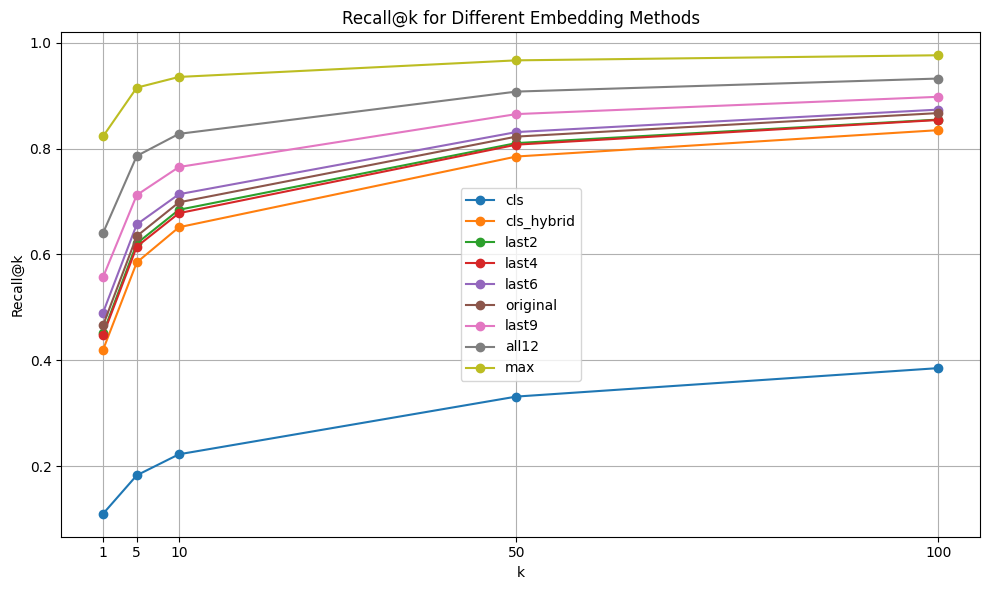

In [286]:
plt.figure(figsize=(10, 6))
for label, recall_values in results.items():
    plt.plot(ks, recall_values, marker='o', label=label)

plt.title("Recall@k for Different Embedding Methods")
plt.xlabel("k")
plt.ylabel("Recall@k")
plt.xticks(ks)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Pushing the performance: Trying different models



<a name='e15'></a>
### Exercise 15 Different model

(15p) In this exercise you are asked to try other BERT-like model from huggingface. You can consider the MSMARCO model [here](https://huggingface.co/sentence-transformers/msmarco-bert-base-dot-v5). Make sure to read the model card on the huggingface website in order to understand how to use it. You don't need to install `sentence-transformers`.

As before, inspect the the representations of tokens and sentences. 

Evaluate the model on sentence retrieval.

In [172]:
#### YOUR CODE HERE

model_name2 = "(sentence-transformers/msmarco-bert-base-dot-v5)"
tokenizer2 = transformers.AutoTokenizer.from_pretrained(model_name2)
model2 = transformers.AutoModel.from_pretrained(model_name2)
model2.to(device)

### YOUR CODE ENDS HERE

tokenizer_config.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [269]:
print(model.config.hidden_size)

768


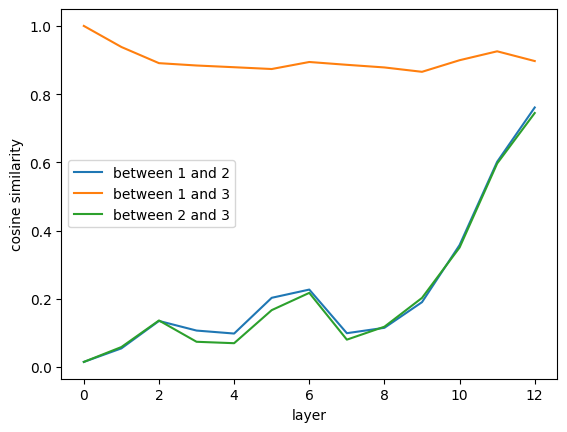

In [222]:
text1 = "there should be a set of spare keys in the back"
text2 = "honey, could you set the table?"
text3 = "i own a colourful set of pencils"
tokenized = tokenizer2([text1, text2, text3], padding=True, return_tensors='pt').to(device)

tokens1 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][2])

tokens_ids_of_interest = [5, 4, 5]

model_outputs = model2(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

['[CLS]', 'a', 'bat', 'swung', 'a', 'sword', 'so', 'fast', ',', 'i', 'could', 'not', 'even', 'blink', '[SEP]']


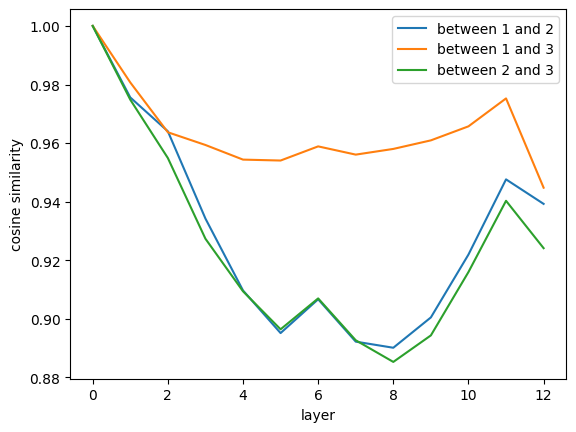

In [298]:
text1 = "the bat flew at my head"
text2 = "i bat the flies away"
text3 = "a bat swung a sword so fast, i could not even blink"
tokenized = tokenizer2([text1, text2, text3], padding=True, return_tensors='pt').to(device)

tokens1 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens3)

tokens_ids_of_interest = [2, 2, 2]

model_outputs = model2(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

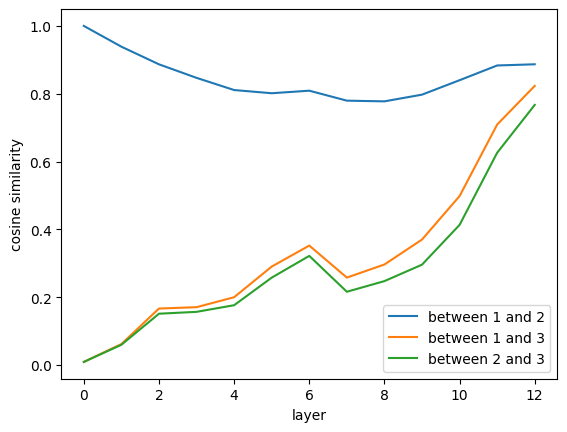

In [223]:
text1 = "Taco Bell ding dong."
text2 = "The Church bell wakes me up every morning."
text3 = "the bell pepper is my favorite vegetable."
tokenized = tokenizer2([text1, text2, text3], padding=True, return_tensors='pt').to(device)
tokens1 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][2])
tokens_ids_of_interest = [3, 3, 1]
model_outputs = model2(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

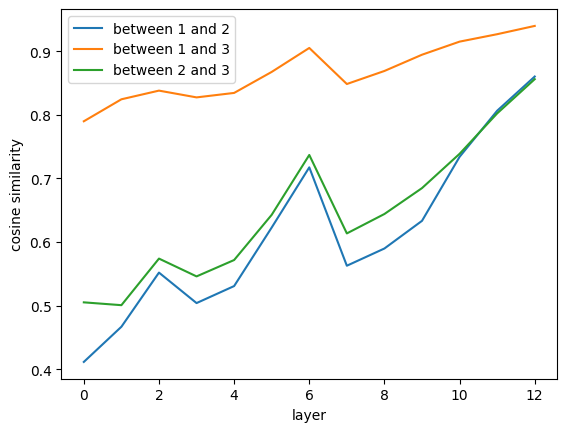

In [308]:
text1 = "The sun is shining, it is so amazing today."
text2 = "some random text"
text3 = "The weather is lovely today."
tokenized = tokenizer2([text1, text2, text3], padding=True, return_tensors='pt').to(device)
model_outputs = model2(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

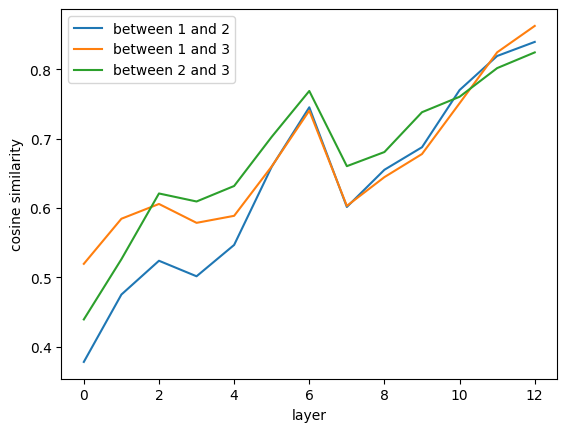

In [306]:


tokenized = tokenizer2([text1, text2, text3], padding=True, return_tensors='pt').to(device)

model_outputs = model2(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

In [214]:
sentence_embeddings2 = embed_dataset(tokenized_sentence_ds, model2, calculate_sentence_embeddings)
compressed_embeddings2 = embed_dataset(tokenized_compressed_ds, model2, calculate_sentence_embeddings)

def embed_query_2(query, sentence_embedding_fn):
    query_tokenized =  tokenizer2([query], truncation=True, max_length=512, return_tensors='pt')

    model_output = model2(**query_tokenized, output_hidden_states=True)

    query_embedding = sentence_embedding_fn(query_tokenized, model_output)

    return query_embedding.detach().cpu()


100%|██████████| 4500/4500 [03:12<00:00, 23.33it/s]


In [315]:
query = "mythical creatures"
query_embedding = embed_query_2(query, calculate_sentence_embeddings)
query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings2)
top_indices = top_k_indices(query_similarity, k=20).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

# q: "tumor"
# Skin cancer is a dangerous form of cancer and can affect anyone.
# similarity: 0.9060725569725037
# Michael Jackson is secretly battling skin cancer, according to new British tabloid reports.
# similarity: 0.8953800797462463
# Tennis legend Martina Navratilova has been diagnosed with breast cancer.
# similarity: 0.8945982456207275
# Cancer is the nation's biggest fear but more than a third wrongly think getting the disease is down to fate and there is nothing they can do to avoid it, say experts.
# similarity: 0.8929523229598999
# Cancer rates in the US have fallen between 2004-2008, thanks in part to screening and treatment advances.
# similarity: 0.890505850315094

# q: "an accident where many were killed, and happy fluffy unicorns"
# Two people were killed Sunday in separate crashes on Connecticut roads, both involving motorcycles.
# similarity: 0.896577000617981
# Two men were killed in accidents since Tuesday.
# similarity: 0.8941206932067871
# One Fort Bliss soldier is killed and another seriously injured after a crash early this morning.
# similarity: 0.8910155296325684
# A pair of motorcycles startled a group of horses, turning a ride along the beach into a commotion that injured seven riders.
# similarity: 0.8887377977371216
# Pune Three persons were killed in separate road accidents in the last two days in the city.
# similarity: 0.883672833442688

# q: "famous person, scandal, drugs"
# Heath Ledger has been described as a ``drug addict'' and a known drug user in a court filing in Los Angeles.
# similarity: 0.8948845863342285
# DJ AM, the celebrity disc jockey who publicly acknowledged his history of drug addiction and had filmed a reality show in which he offered to help other addicts, was found dead in his apartment.
# similarity: 0.8844748139381409
# Prince Harry joked about his naked picture scandal during his first public appearance since the incident earlier today.
# similarity: 0.8815076947212219
# World Champion Snooker player John Higgins has tonight revealed the terrifying truth behind the most shocking scandal to rock his profession ever.
# similarity: 0.881434977054596
# Tiger Woods, one of the world's most famous athletes, is taking an indefinite break from professional golf to ``repair the damage'' he's done with marital infidelities, Woods said Friday on his website, dpa reported.
# similarity: 0.8791390061378479

# q: "Neisseria forms diploids, streptococci form chains, and staphylococci group together in grape-like clusters"
# We asked local Patchers in the Hudson Valley what the Fourth of July means to them.
# similarity: 0.8642284870147705
# He says cases of poison ivy or allergic contact dermatitis is what's going around.
# similarity: 0.8635368347167969
# Britney Spears and Demi Lovato are OFFICIALLY joining the US 'X-Factor!'
# similarity: 0.8628926873207092
# The GPU maker Nvidia has joined the Linux Foundation.
# similarity: 0.8622088432312012
# Winter gives way to spring in the northern hemisphere on Friday, as day and night are of equal length at the vernal equinox.
# similarity: 0.8617708683013916

# q:  "something but nothing"
# Dont get rid of anything good, somebody might can use it.
# similarity: 0.8920446038246155
# Most likely, you are not at all thinking about what I am thinking.
# similarity: 0.8791869282722473
# But then I saw the Tweet That Explains Everything.
# similarity: 0.8790520429611206
# People need not to panic as nothing extraordinary is going to happen, said the weathermen.
# similarity: 0.8777636289596558
# Before you can see what's wrong with SOA someone needs to define what SOA is.
# similarity: 0.8772444725036621

# q: "volcano"
# What is Siri, you ask?
# similarity: 0.912153959274292
# An Indonesian volcano has spewed more hot ash & debris into the air, sending villagers fleeing.
# similarity: 0.9071139097213745
# Large earthquakes can trigger volcanic eruptions up to a year later and up to 500 kilometres away from their epicentres, according to new research.
# similarity: 0.9056851863861084
# An Indonesian volcano erupted with renewed ferocity on Friday, killing 65 people, bringing the total death told to over 100 and blanketing the area with white ash.
# similarity: 0.9043518304824829
# The world's longest continuous volcanic eruption is marking its 28th anniversary this month.Kilauea Volcano's east rift zone began erupting on Jan. 3, 1983 and has continued uninterrupted since.A second, simultaneous eruption began at Kilauea's summit on March 19, 2008.The Hawaii Volcano Observatory together with Hawaii Volcanoes National Park, Hawaii County Civil Defense and the University of Hawaii at Hilo plan to mark Monday's milestone by hosting public lectures, guided hikes and other activities throughout January.
# similarity: 0.9042828679084778

#q: "volcano erupted"
# An Indonesian volcano erupted with renewed ferocity on Friday, killing 65 people, bringing the total death told to over 100 and blanketing the area with white ash.
# similarity: 0.9174306392669678
# Large earthquakes can trigger volcanic eruptions up to a year later and up to 500 kilometres away from their epicentres, according to new research.
# similarity: 0.910586416721344
# The world's longest continuous volcanic eruption is marking its 28th anniversary this month.Kilauea Volcano's east rift zone began erupting on Jan. 3, 1983 and has continued uninterrupted since.A second, simultaneous eruption began at Kilauea's summit on March 19, 2008.The Hawaii Volcano Observatory together with Hawaii Volcanoes National Park, Hawaii County Civil Defense and the University of Hawaii at Hilo plan to mark Monday's milestone by hosting public lectures, guided hikes and other activities throughout January.
# similarity: 0.9104064702987671
# An Indonesian volcano that had been dormant for more than four centuries erupted for the second day in a row Monday, spewing out towering clouds of ash and forcing the evacuation of more than 21,000 people.
# similarity: 0.9100503325462341
# An Indonesian volcano has spewed more hot ash & debris into the air, sending villagers fleeing.
# similarity: 0.908807098865509

#q: "tomato gazillion quandry apples ten spoon, cloth"
# In National news tonight, The iPad went on sale Saturday and hundreds lined up to buy one.CBS's Molly Wood has a look at the latest Apple frenzy from California.
# similarity: 0.8705146312713623
# In its first five days on the market Apple has sold 450,000 iPads in the US, shifting a massive 300,000 on the first day.
# similarity: 0.8688725829124451
# The Apple Store is down for maintenance.
# similarity: 0.8677711486816406
# Apple was granted five patents by the US Patent & Trademark Office, today.
# similarity: 0.8674399852752686
# Apple sold three million iPads in the three days since the new versions launched, it's announced.
# similarity: 0.8672112226486206

# q: "i like to eat apples"
# What is Siri, you ask?
# similarity: 0.902780294418335
# Doctors say that kids do not need to eat organic to stay healthy; a diet rich in fruits, vegetables, whole grains and low-fat dairy is necessary for child health though.
# similarity: 0.899832010269165
# McDonald's Corp. says it is adding apple slices to every Happy Meal.
# similarity: 0.8982993364334106
# In order to serve you better, I would really like to know what you like most about 'Twilight'.
# similarity: 0.89621502161026
# Apple now has a bigger budget than the entire US government, according to US Treasury Department figures.
# similarity: 0.896110475063324


In 2009 few would have been expecting to have been accosted by Miike Snow, who until now, hidden behind the imagery of a mythical jackalope, the fabled horned rabbit have been churning out a slew of tracks and remixes that have set the blogospheres ablaze, amidst the inevitable questions of what, where & who is Miike Snow?...
similarity: 0.8938430547714233
Alien like sea creatures that have washed ashore on beaches around Cape Town have been identified as a rare barnacles.
similarity: 0.8904134035110474
What is Siri, you ask?
similarity: 0.8834614157676697
From fish playing dead to dogs faking injureys, here are five of the oddest animal behaviors explained.
similarity: 0.880897045135498
As per reports, a large number of periodical cicadas are seen crawling out of Earth.
similarity: 0.8807084560394287
So is it surprising that William Shatner believes in aliens?
similarity: 0.8802852630615234
we present to you some lesser known facts about Rajesh Khanna.
similarity: 0.8799392580986023
e

In [311]:
ks2=[1,5,10,50,100,500,1000]
recalls2 = []

for k in ks2:
    r = calculate_recall(compressed_embeddings2, sentence_embeddings2, k=k)
    recalls2.append(r)


100%|██████████| 36000/36000 [00:10<00:00, 3557.25it/s]


In [313]:
print(recalls2)

[0.9024722222222222, 0.9594166666666667, 0.9696666666666667, 0.9835277777777778, 0.9874722222222222, 0.9931944444444445, 0.9951666666666666]


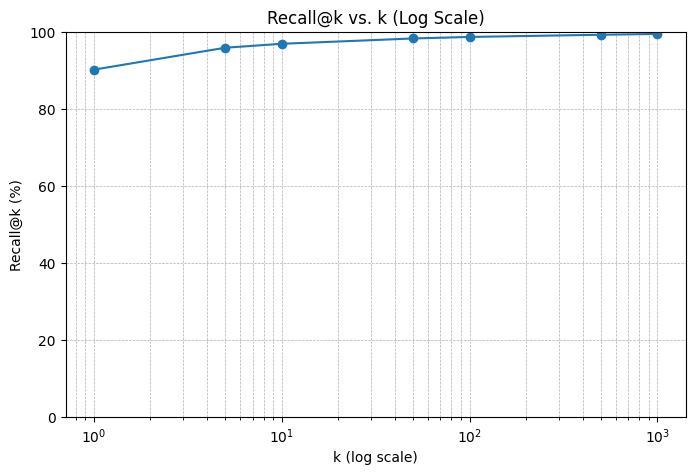

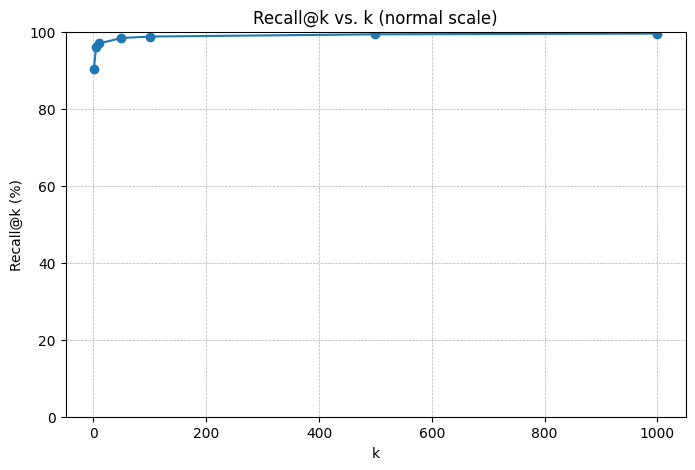

In [312]:
plot_recall_curve_log(ks2, recalls2)
plot_recall_curve(ks2, recalls2)

### Exercise 16 Comparison between models

(10p) Compare the models you used in this lab (and optionally the previous lab if you completed it). Discuss the results and the potential benefits and drawbacks of each method.

['[CLS]', 'i', 'own', 'a', 'colourful', 'set', 'of', 'pencil', '##s', '[SEP]', '[PAD]', '[PAD]', '[PAD]']


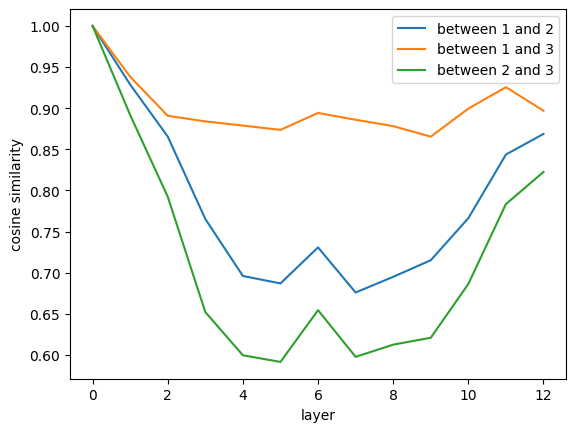

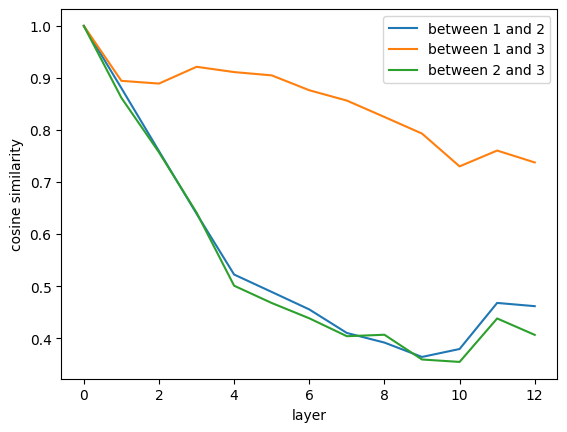

In [329]:
text1 = "there should be a set of spare keys in the back"
text2 = "honey, could you set the table?"
text3 = "i own a colourful set of pencils"
tokenized = tokenizer2([text1, text2, text3], padding=True, return_tensors='pt').to(device)

tokens1 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][2])

tokenized2 = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

tokens12 = tokenizer.convert_ids_to_tokens(tokenized2['input_ids'][0])
tokens22 = tokenizer.convert_ids_to_tokens(tokenized2['input_ids'][1])
tokens32 = tokenizer.convert_ids_to_tokens(tokenized2['input_ids'][2])


tokens_ids_of_interest = [5, 5, 5]

model_outputs = model2(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

model_outputs2 = model(**tokenized2, output_hidden_states=True)
plot_evolving_similarities(model_outputs2['hidden_states'], tokens_ids_of_interest)


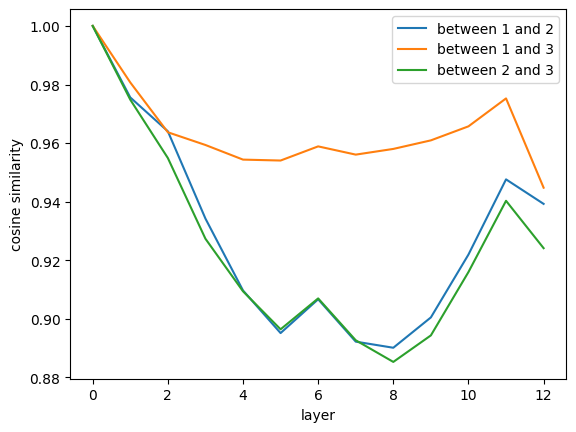

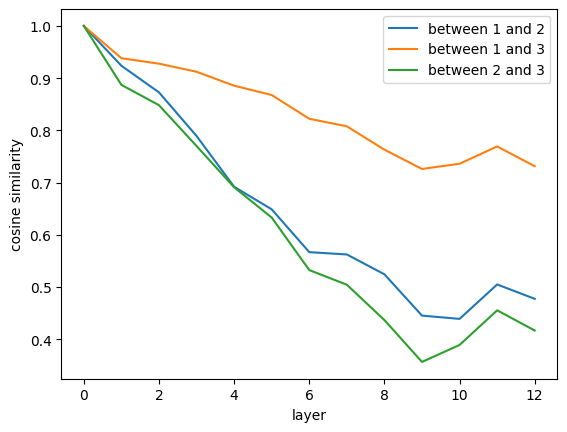

In [323]:
text1 = "the bat flew at my head"
text2 = "i bat the flies away"
text3 = "a bat swung a sword so fast, i could not even blink"

tokenized = tokenizer2([text1, text2, text3], padding=True, return_tensors='pt').to(device)

tokens1 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer2.convert_ids_to_tokens(tokenized['input_ids'][2])

tokenized2 = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

tokens12 = tokenizer.convert_ids_to_tokens(tokenized2['input_ids'][0])
tokens22 = tokenizer.convert_ids_to_tokens(tokenized2['input_ids'][1])
tokens32 = tokenizer.convert_ids_to_tokens(tokenized2['input_ids'][2])

tokens_ids_of_interest = [2, 2, 2]

model_outputs = model2(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

model_outputs2 = model(**tokenized2, output_hidden_states=True)
plot_evolving_similarities(model_outputs2['hidden_states'], tokens_ids_of_interest)

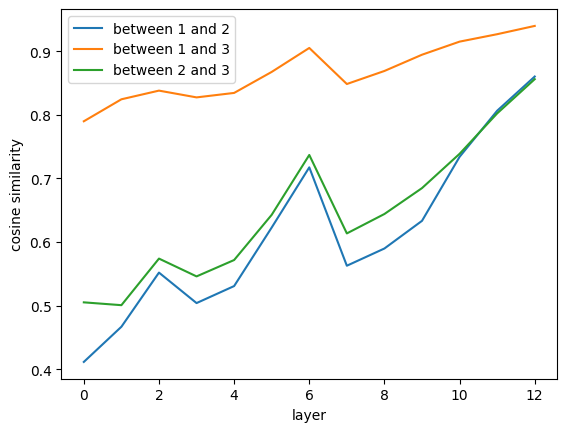

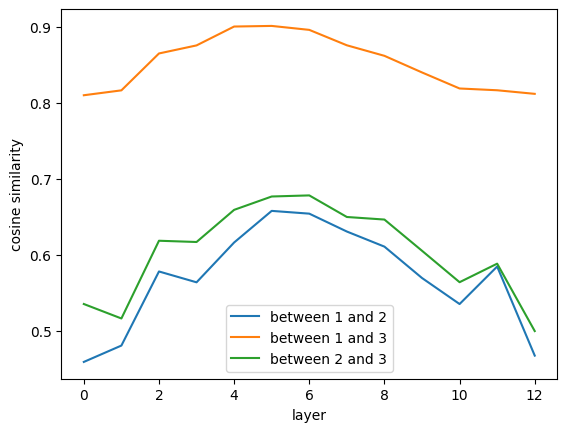

In [324]:
text1 = "The sun is shining, it is so amazing today."
text2 = "some random text"
text3 = "The weather is lovely today."

tokenized = tokenizer2([text1, text2, text3], padding=True, return_tensors='pt').to(device)
tokenized2 = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

model_outputs = model2(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

model_outputs2 = model(**tokenized2, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized2, model_outputs2, calculate_sentence_embeddings)


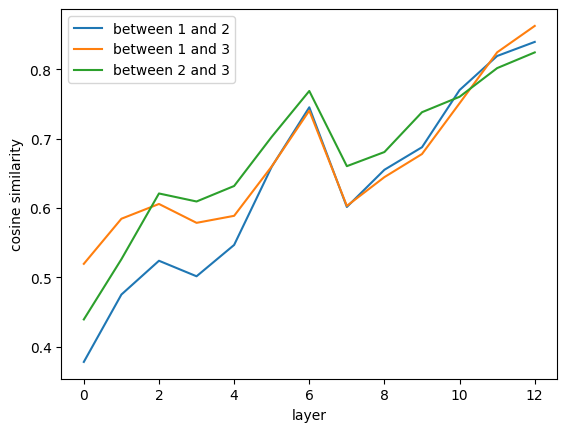

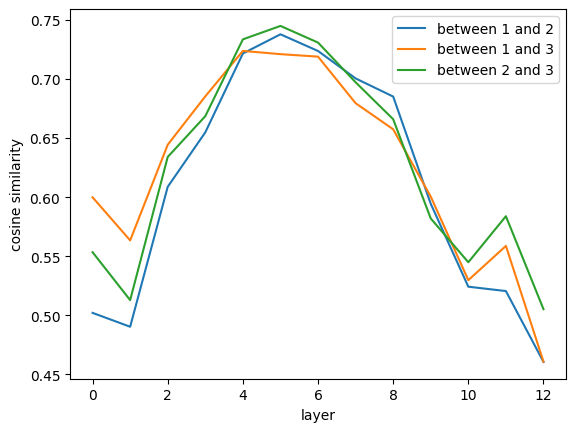

In [330]:
text1 = "The mitochondria is the powerhouse of the cell."
text2 = "I enjoy drinking fresh molten lava on Sundays."
text3 = "And he scored a brilliant goal"

tokenized = tokenizer2([text1, text2, text3], padding=True, return_tensors='pt').to(device)
tokenized2 = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

model_outputs = model2(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

model_outputs2 = model(**tokenized2, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized2, model_outputs2, calculate_sentence_embeddings)

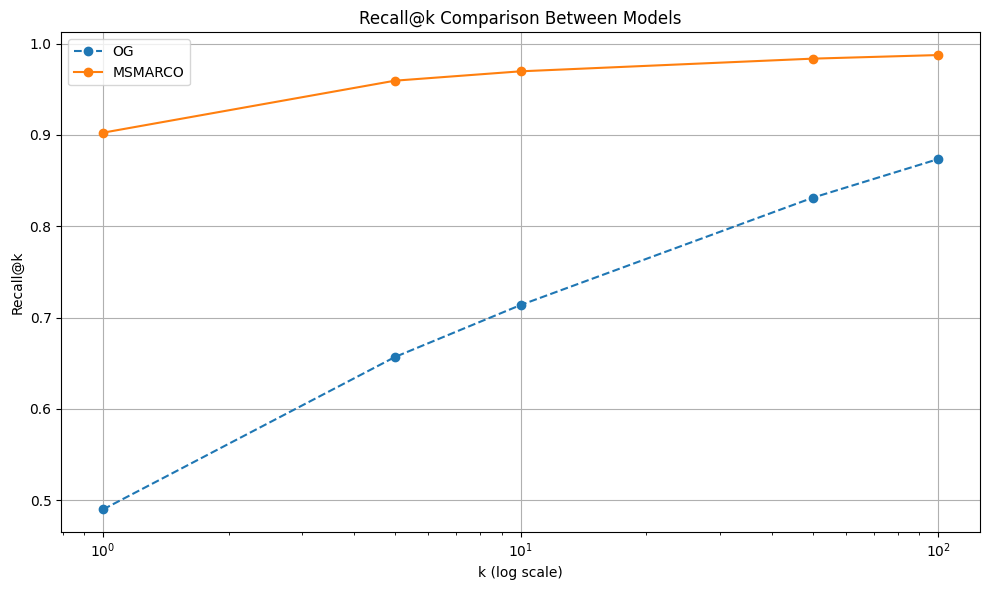

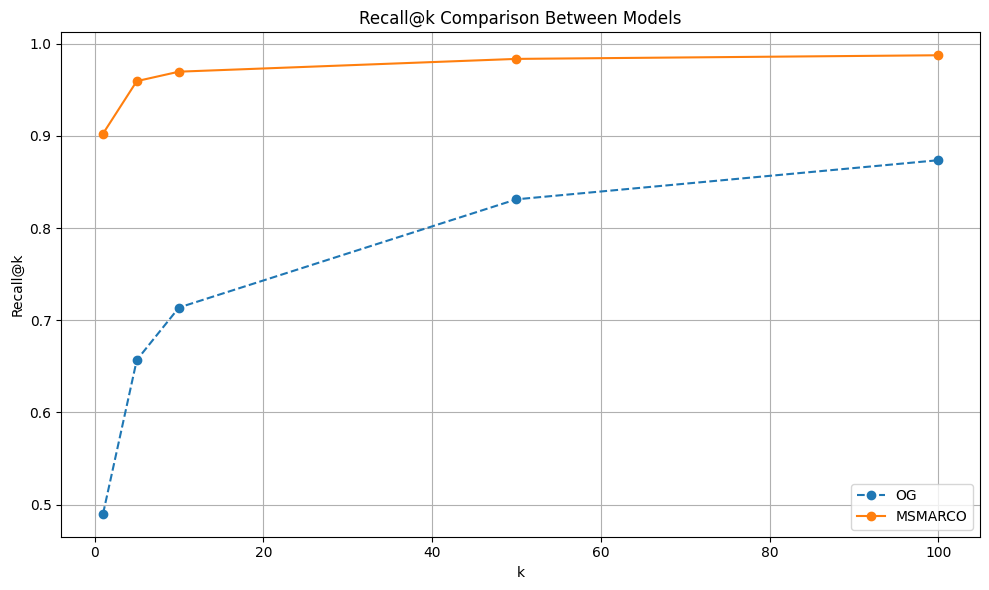

In [337]:
plt.figure(figsize=(10, 6))

plt.plot(ks2, recalls[:5], marker='o', label='OG', linestyle='--')
plt.plot(ks2, recalls2[:5], marker='o', label='MSMARCO', linestyle='-')

plt.xscale('log')
plt.xlabel('k (log scale)')
plt.ylabel('Recall@k')
plt.title('Recall@k Comparison Between Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(ks2, recalls[:5], marker='o', label='OG', linestyle='--')
plt.plot(ks2, recalls2[:5], marker='o', label='MSMARCO', linestyle='-')

plt.xlabel('k')
plt.ylabel('Recall@k')
plt.title('Recall@k Comparison Between Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()